<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 7: *Imbalanced Classification & NN***

###**Tenggat Waktu: Selasa, 03 Desember 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: Selasa, 03 Desember 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa yang mengerjakan lab menggunakan chatgpt tidak akan dinilai dan otomatis mendapat nilai 0



In [84]:
# Isi dengan data diri Anda
NAMA = "Irgi Muttaqin Fahrezi Situmorang"
KELAS = "C"
NPM = "2406385933"
USERNAME_KAGGLE = "irgimuttaqinfahrezi"


# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = [
    # 1. Sklearn MLPClassifier Documentation
    "https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html",

    # 2. Sklearn Early Stopping in MLPClassifier
    "https://scikit-learn.org/stable/whats_new/v0.22.html#id14",

    # 3. Sklearn Solver and Max Iterations
    "https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier",

    # 4. Understanding Neural Networks and Training Issues
    "https://machinelearningmastery.com/early-stopping-to-avoid-overfitting-with-keras/",

    # 5. SMOTE (Synthetic Minority Over-sampling Technique)
    "https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html",

    # 6. RandomUnderSampler and TomekLinks Documentation
    "https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html",
    "https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.TomekLinks.html"
]


In [85]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Irgi Muttaqin Fahrezi Situmorang dari kelas C dengan NPM 2406385933, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Irgi Muttaqin Fahrezi Situmorang)


# Import Library

In [86]:
import numpy as np
from numpy import where
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import Pipeline
from sklearn import clone
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score


# Functions

In [87]:
def plot_datasets_for_comparison(X1, y1, title1, X2, y2, title2, figsize=(16, 6)):
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    axes[0].scatter(X1[y1 == 0][:, 0], X1[y1 == 0][:, 1], label='Class 0 (Majority)')
    axes[0].scatter(X1[y1 == 1][:, 0], X1[y1 == 1][:, 1], label='Class 1 (Minority)')
    axes[0].set_title(title1, fontsize=14)
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].legend()

    axes[1].scatter(X2[y2 == 0][:, 0], X2[y2 == 0][:, 1], label='Class 0 (Majority)')
    axes[1].scatter(X2[y2 == 1][:, 0], X2[y2 == 1][:, 1], label='Class 1 (Minority)')
    axes[1].set_title(title2, fontsize=14)
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].legend()

    x_min = min(X1[:, 0].min(), X2[:, 0].min())
    x_max = max(X1[:, 0].max(), X2[:, 0].max())
    y_min = min(X1[:, 1].min(), X2[:, 1].min())
    y_max = max(X1[:, 1].max(), X2[:, 1].max())

    axes[0].set_xlim(x_min, x_max)
    axes[0].set_ylim(y_min, y_max)
    axes[1].set_xlim(x_min, x_max)
    axes[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

def plot_single_dataset(X, y, title, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Class 0 (Majority)')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1 (Minority)')
    plt.title(title, fontsize=14)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Imbalanced Classification

Imbalanced classification merupakan suatu masalah dari klasifikasi ketika dataset training memiliki distribusi kelas yang tidak seimbang. Ini artinya jumlah contoh dalam satu atau beberapa kelas jauh lebih sedikit dibandingkan kelas lainnya. Masalah ini harus diidentifikasi sebelum melakukan training pada suatu model karena algoritma-algoritma dalam machine learning bekerja berdasarkan asumsi bahwa dataset yang digunakan memiliki jumlah samkple yang sama. Jika algoritma tersebut dipakai pada masalah classification dengan ciri-ciri imbalanced, maka hasil classification tersebut kemungkinan besar menjadi sangat buruk karena model cenderung bias ke kelas mayoritas. Padahal pada berbagai kasus, kelas minoritas tersebut bisa dikatakan lebih penting daripada kelas mayoritas.

Misalnya, pada kasus diagnosis penyakit, biasanya jumlah orang sehat jauh lebih banyak dibandingkan orang yang sakit. Sebagai contoh, dari 100 orang, hanya 5 orang yang terdiagnosis sakit. Jika model tidak dirancang untuk menangani dataset yang imabalance, model cenderung memprediksi orang sakit sebagai sehat. Hal ini disebabkan oleh kurangnya informasi atau pola yang dapat dipelajari oleh model dari kelas minoritas (orang sakit). Tentunya, mengklasifikasikan orang sakit sebagai sehat adalah kesalahan yang dapat berdampak fatal bagi orang yang benar-benar sakit/membutuhkan perawatan. Oleh karena itu penanganan dataset yang imbalance pada suatu masalah classification sangat penting untuk dilakukan.

Tingkat ketidakseimbangan kelas dapat bervariasi:
1. **Slight Imbalance**, misalnya rasio 4:6, biasanya dapat ditangani seperti masalah klasifikasi biasa karena rasio cenderung balance.
2. **Severe Imbalance**, seperti rasio 1:100 atau lebih, membutuhkan pendekatan/teknik khusus agar model dapat mendeteksi kelas minoritas dengan benar

Agar kita memiliki gambaran mengenai Imbalanced Classification ini, perhatikan kode berikut:

### Slightly Imbalanced

In [88]:
# Membuat dataset slightly imbalanced
X_slight, y_slight = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.6, 0.4],
    flip_y=0,
    random_state=17
)

# Hitung jumlah sampel pada masing-masing kelas
Counter(y_slight)

Counter({np.int64(0): 6000, np.int64(1): 4000})

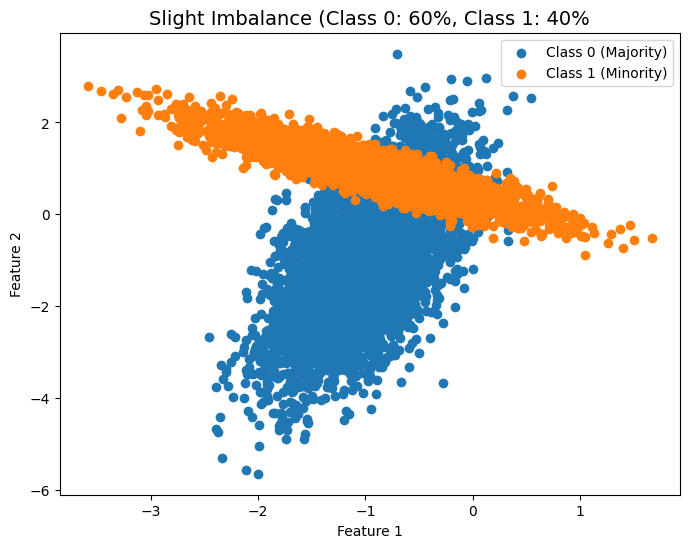

In [89]:
plot_single_dataset(X_slight, y_slight, "Slight Imbalance (Class 0: 60%, Class 1: 40%")

### Severely Imbalanced

In [90]:
# Membuat dataset severely imbalanced
X_severe, y_severe = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    weights=[0.99, 0.01],
    flip_y=0,
    random_state=17
)

# Hitung jumlah sampel pada masing-masing kelas
Counter(y_severe)

Counter({np.int64(0): 9900, np.int64(1): 100})

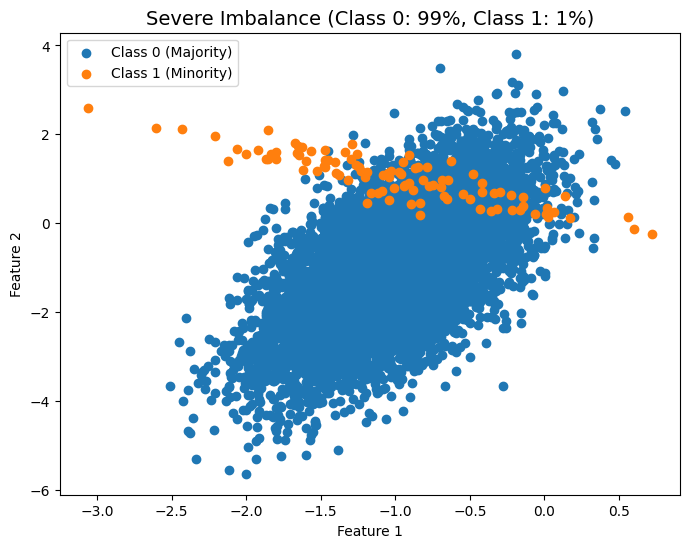

In [91]:
plot_single_dataset(X_severe, y_severe, "Severe Imbalance (Class 0: 99%, Class 1: 1%)", figsize=(8, 6))

Terlihat jelas perbedaan jumlah kelas minoritas antara dataset slightly imbalanced dengan severely imbalanced. Jumlah kelas minoritas yang sedikit ini nantinya akan berpengaruh buruk pada kinerja model dalam mengklasifikasi kelas minoritas. Agar lebih paham, mari kita simak evaluasi model DecisionTreeClassifier dengan menggunakan dataset yang slightly imbalanced dan juga severely imbalanced

### Evaluasi dengan slightly imbalanced dataset

In [92]:
model = DecisionTreeClassifier(random_state=42)

# Cross-validation menggunakan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model, X_slight, y_slight, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.8977
f1_macro score: 0.8933861929913063
precision_macro score: 0.8936370466578648
recall_macro score: 0.8932083333333335


Skor F1 dan skor lainnya lumayan tinggi, bisa dikatakan bahwa model DecisionTreeClassifier sudah bisa memprediksi kelas minoritas dan mayoritas dengan baik.

### Evaluasi dengan severely imbalanced dataset

In [93]:
model = DecisionTreeClassifier(random_state=42)

# Cross-validation menggunakan StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(model, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9879
f1_macro score: 0.6933756229197872
precision_macro score: 0.6999315145422763
recall_macro score: 0.691969696969697


Terlihat bahwa akurasi DecisionTree pada kedua dataset lumayan tinggi. Tetapi perlu diingat bahwa metrik akurasi dipengaruhi oleh semua prediksi yang benar (True negatives) dan (True positives). Pada slightly imbalanced dataset, skor akurasi dan metrik lainnya tidak menunjukkan perbedaan yang signifikan. Hal ini terjadi karena model dapat memanfaatkan informasi yang cukup dari kedua kelas, meskipun distribusinya tidak sepenuhnya seimbang. Namun, pada severely imbalanced dataset, skor recall, precision, dan F1 jauh lebih rendah dibandingkan skor akurasi. Ini menunjukkan bahwa meskipun model terlihat bagus dari sisi akurasi, kemampuannya untuk memprediksi kelas minoritas masih kurang. Dari sini, bisa dikatakan bahwa akurasi bukanlah metrik yang dapat diandalkan untuk menilai performa model pada dataset yang severely imbalanced (dengan asumsi positive class adalah class minoritas). Dominasi kelas mayoritas cenderung memengaruhi hasil model, sehingga informasi dari kelas minoritas sering terabaikan.

Untuk menangani kasus severe imbalance, kita bisa menerapkan teknik data sampling. Data sampling adalah teknik yang digunakan untuk membuat distribusi kelas menjadi lebih balance. Contohnya adalah dengan **Oversampling** (menambah jumlah data kelas minoritas) dan **Undersampling** (mengurangi jumlah data kelas mayoritas). Perlu diperhatikan juga bahwa data sampling hanya diterapkan pada training set dan tidak dilakukan pada validation atau test set karena kita ingin model untuk mempelajari pola data dengan baik pada kelas minoritas, yang kemudian hasil evaluasi model tersebut dapat mencerminkan performa model pada data di dunia nyata yang tetap tidak seimbang.

## Oversampling

**Oversampling** adalah teknik yang digunakan untuk **menambah jumlah data dari kelas minoritas** dalam sebuah dataset. Tujuannya adalah untuk menyeimbangkan distribusi kelas pada dataset. Terdapat 2 tipe utama dalam metode oversampling berdasarkan cara penambahan data, yaitu:
1.  **Penduplikasian Data**: Menambah sampel dengan menduplikasi data yang sudah ada dari kelas minoritas. Contohnya adalah **Random Oversampling**
2. **Pembuatan Data Sintetik**: Menambah sampel dengan membuat data baru yang mirip dengan data asli dari kelas minoritas. Contohnya antara lain:
    - Synthetic Minority Oversampling Technique (SMOTE),
    - Borderline-SMOTE,
    - Borderline Oversampling with SVM, dan
    - Adaptive Synthetic Sampling (ADASYN).

Selanjutnya kita akan membahas masing-masing contoh oversampling diatas beserta cara mengimplementasikannya dalam kode.

### Random Oversampling

Random Oversampling adalah teknik untuk mengatasi imbalanced dataset dengan cara menambah jumlah data di kelas minoritas melalui duplikasi data yang ada secara random. Proses duplikasi data ini tidak akan menambah informasi baru.

In [94]:
# Definisi random undersampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling
X_rand_over, y_rand_over = rand_over.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

Counter({np.int64(0): 9900, np.int64(1): 9900})


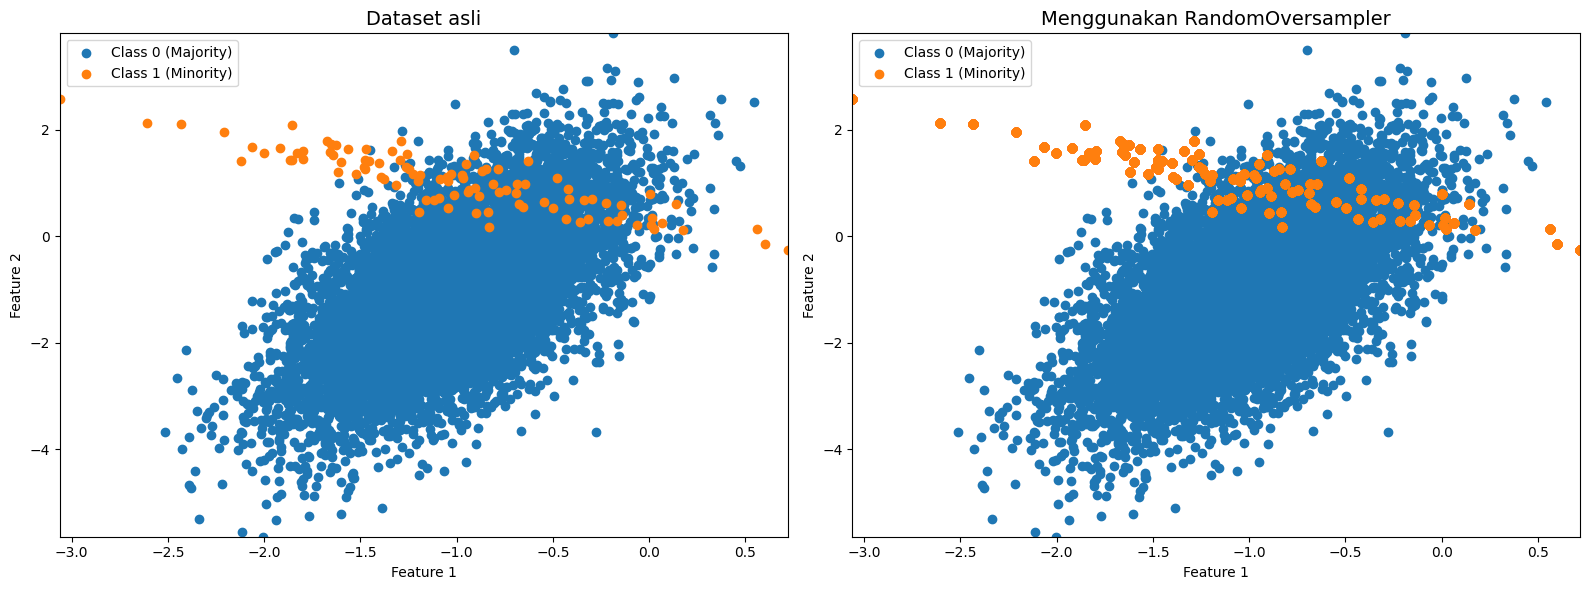

In [95]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset asli", X_rand_over, y_rand_over, "Menggunakan RandomOversampler")

Memang kelihatan tidak ada perbedaan antara dataset asli dan yang menggunakan RandomOversampler. Hal ini karena RandomOversampler bekerja dengan menduplikasi data atau titik-titik yang sudah ada pada dataset asli, sehingga titik yang baru akan tertumpuk pada titik yang sama pada dataset asli.

Perlu diingat bahwa ketika kita mencoba membuat distribusi kelas menjadi sepenuhnya seimbang pada dataset yang sangat tidak seimbang, itu dapat menyebabkan overfitting pada kelas minoritas. Mengapa? Karena data minoritas diperbanyak melalui duplikasi, model dapat mengingat (memorize) pola dari kelas minoritas secara berlebihan tanpa benar-benar mempelajari hubungan yang relevan dengan data mayoritas. Hal ini dapat membuat model memiliki performa yang sangat baik pada training dataset, tetapi gagal untuk generalize pada data baru (test dataset). Oleh karena itu, kita perlu mengetahui apakah metode ini cocok untuk digunakan atau tidak dengan membandingkan kinerja model dengan dan tanpa oversampling.

### Synthetic Minority Oversampling Technique (SMOTE)

Berbeda dengan RandomOversampling yang bekerja dengan cara menduplikasi data yang sudah ada, SMOTE bekerja dengan cara membuat data sintetik baru dengan memanfaatkan interpolasi antara data dari kelas minoritas yang sudah ada. Prosedurnya adalah sebagai berikut:
1. SMOTE memilih satu instance dari kelas minoritas secara acak dan mencari k nearest minority class neighbors nya
2. Pilih salah satu neighbor secara acak
3. Data baru yang dihasilkan akan terletak pada garis yang menghubungkan instance dan neighbornya

![SMOTE](https://i.ibb.co/MV143tn/Screenshot-2024-04-23-132339.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.37*

In [96]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling
X_smote, y_smote = smote.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

Counter({np.int64(0): 9900, np.int64(1): 9900})


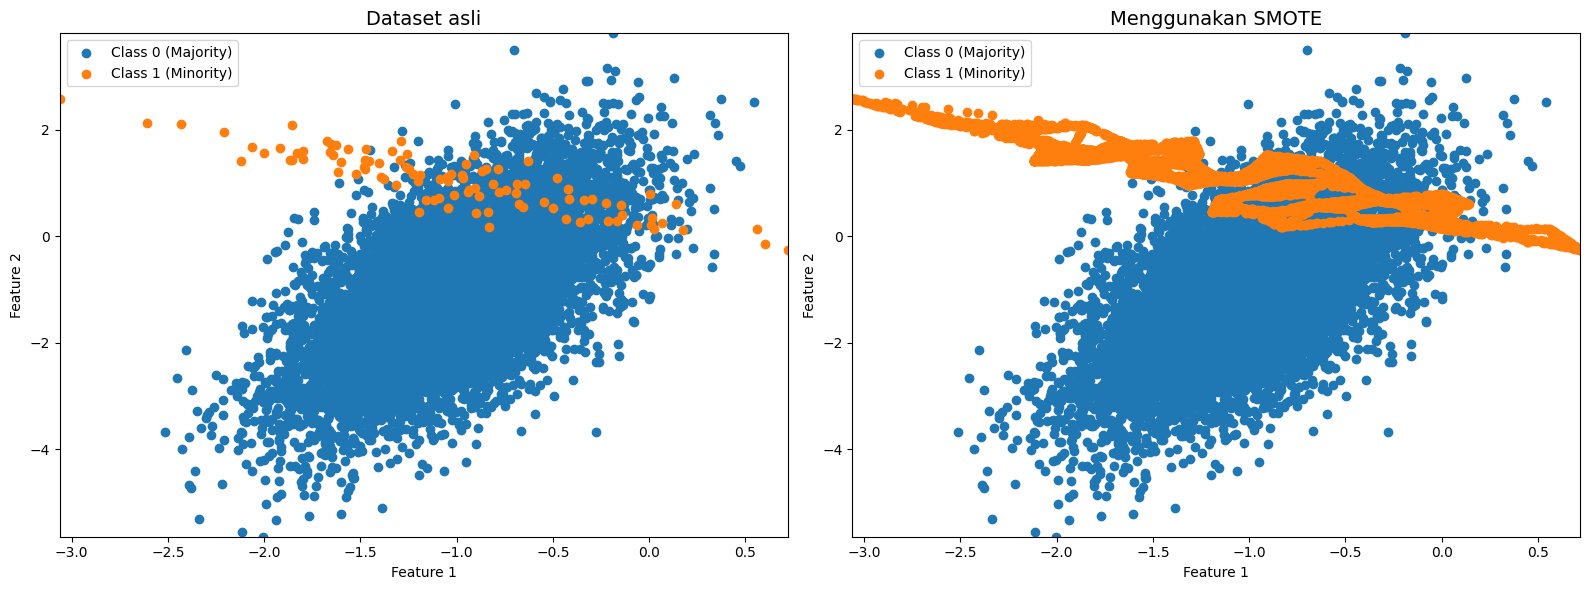

In [97]:
# Perbandingan scatter plot antara dataset asli dan dataset sampling
plot_datasets_for_comparison(X_severe, y_severe, "Dataset asli", X_smote, y_smote, "Menggunakan SMOTE")

### Borderline-SMOTE

merupakan pengembangan dari SMOTE yang menggunakan algoritma seperti k-nearest neighbor untuk mengidentifikasi sampel kelas minoritas yang biasanya salah diklasifikasikan. Data sintetik akan dibuat di sekitar area sampel tersebut agar dapat membantu model fokus pada area yang sulit diklasifikan.

In [98]:
# Definisi Borderline SMOTE class
borderline_smote = BorderlineSMOTE()

# Resampling
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

Counter({np.int64(0): 9900, np.int64(1): 9900})


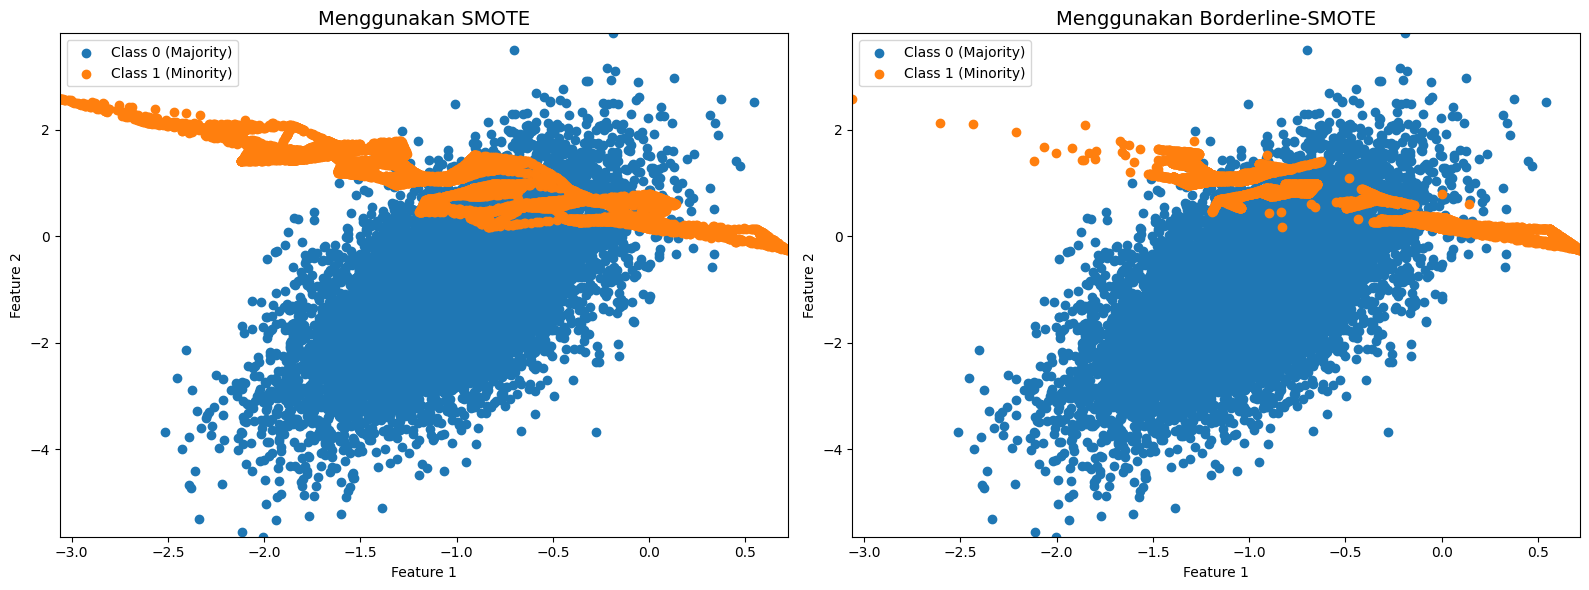

In [99]:
plot_datasets_for_comparison(X_smote, y_smote, "Menggunakan SMOTE", X_borderline_smote, y_borderline_smote, "Menggunakan Borderline-SMOTE")

### Borderline Oversampling with SVM

Versi Borderline-SMOTE yang menggunakan SVM sebagai pengganti KNN untuk mengidentifikasi sampel kelas minoritas yang biasanya salah diklasifikasikan.

In [100]:
# Definisi Borderline SMOTE dengan SVM class
svm_smote = SVMSMOTE()

# Resampling
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

Counter({np.int64(0): 9900, np.int64(1): 9900})


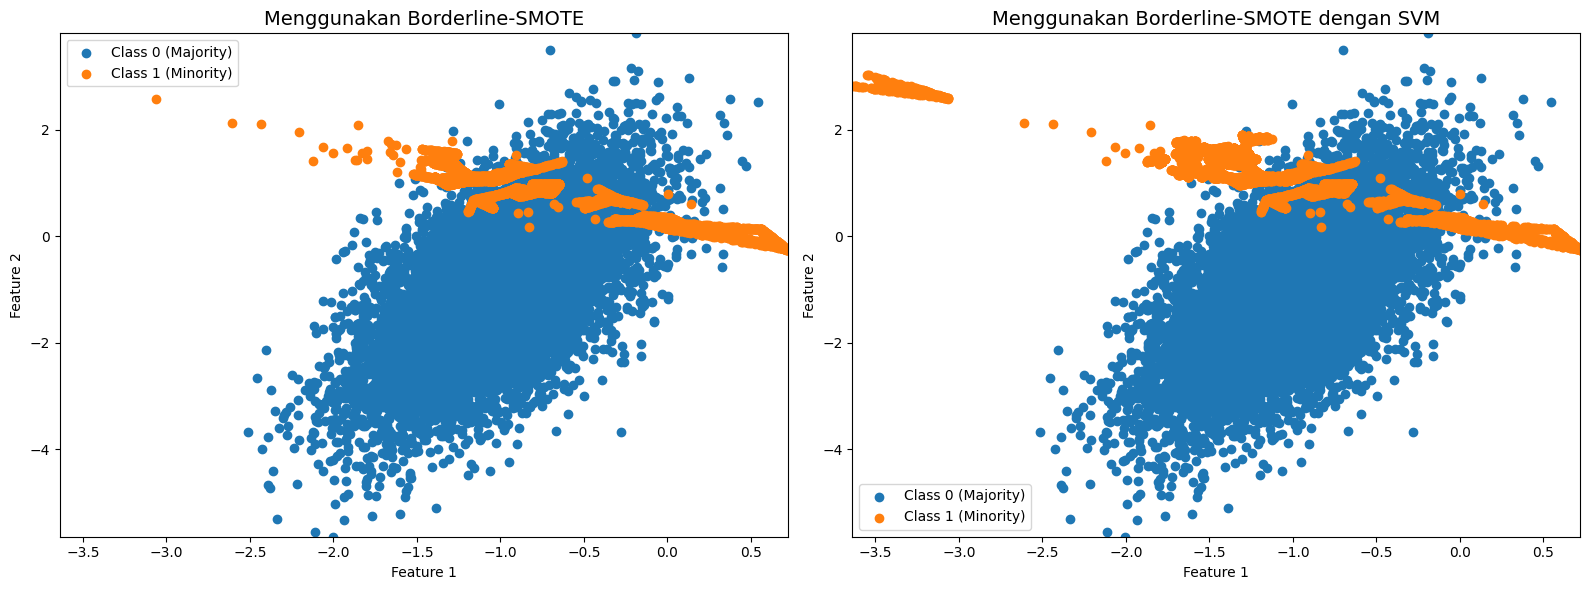

In [101]:
plot_datasets_for_comparison(X_borderline_smote, y_borderline_smote, "Menggunakan Borderline-SMOTE", X_svm_smote, y_svm_smote, "Menggunakan Borderline-SMOTE dengan SVM")

### Adaptive Synthetic Sampling (ADASYN)

menyesuaikan jumlah data sintetis yang dihasilkan berdasarkan sulit atau tidaknya memprediksi sampel dari kelas minoritas berdasarkan distribusi datanya. Sampel dari kelas minoritas yang lebih sulit diprediksi mendapatkan lebih banyak data sintetis, sedangkan sampel yang lebih mudah diprediksi mendapatkan lebih sedikit data sintetis.

In [102]:
# Definisi ADASYN class
adasyn = ADASYN()

# Resampling
X_adasyn, y_adasyn = adasyn.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

Counter({np.int64(0): 9900, np.int64(1): 9898})


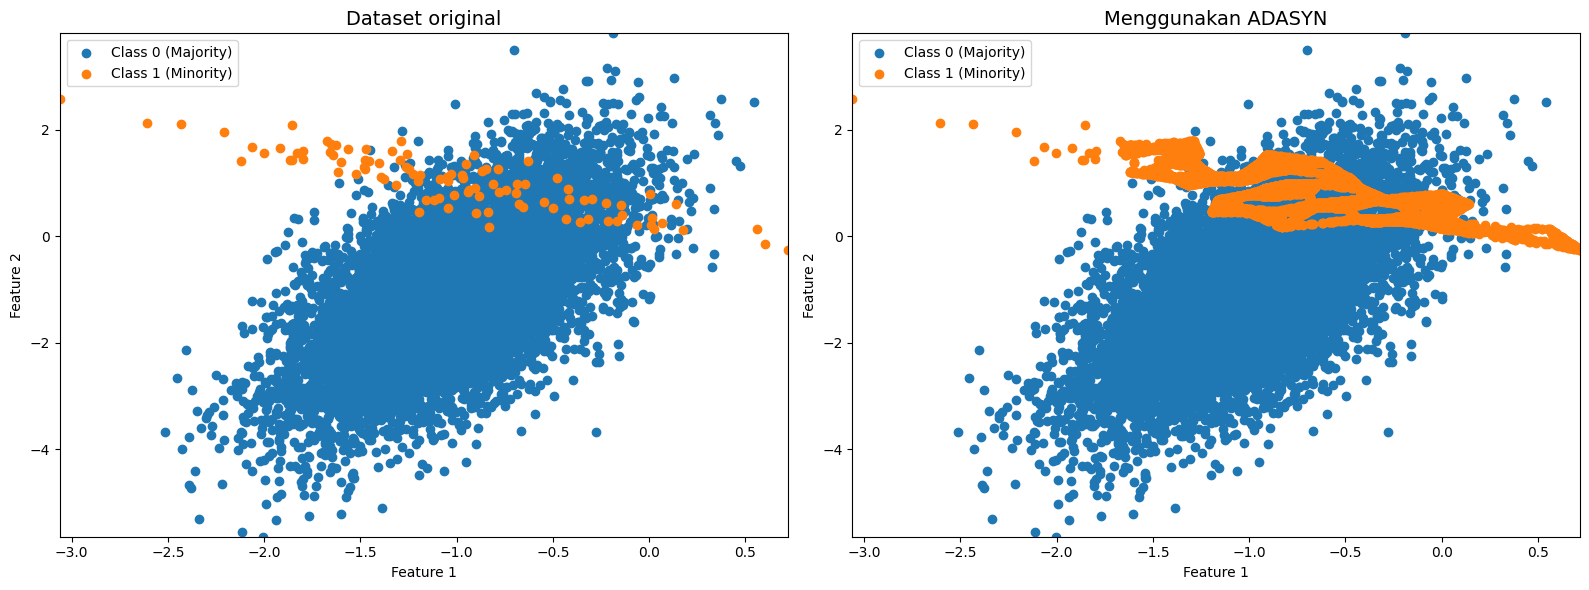

In [103]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_adasyn, y_adasyn, "Menggunakan ADASYN")

## Undersampling

**Undersampling** adalah teknik yang digunakan untuk **mengurangi jumlah data dari kelas mayoritas** dalam sebuah dataset. Tujuannya sama dengan oversampling, yaitu untuk meyeimbangkan distribusi kelas pada dataset. Misalnya mengurangi rasio antara kelas minoritas dengan kelas mayoritas dari 1:99 menjadi 1:10, 1:1, dsb. Terdapat beberapa metode undersampling yang ada, antara lain:
- Random Undersampling,
- Near Miss Undersampling, dan
- Tomek Link Undersampling.

Selanjutnya kita akan membahas masing-masing contoh undersampling diatas beserta cara mengimplementasikannya dalam kode.

### Random Undersampling

memilih sampel acak dari kelas mayoritas dan kemudian menghapusnya dari dataset.

In [104]:
# Definisi RandomUnderSampler class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling
X_rand_under, y_rand_under = rand_under.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

Counter({np.int64(0): 100, np.int64(1): 100})


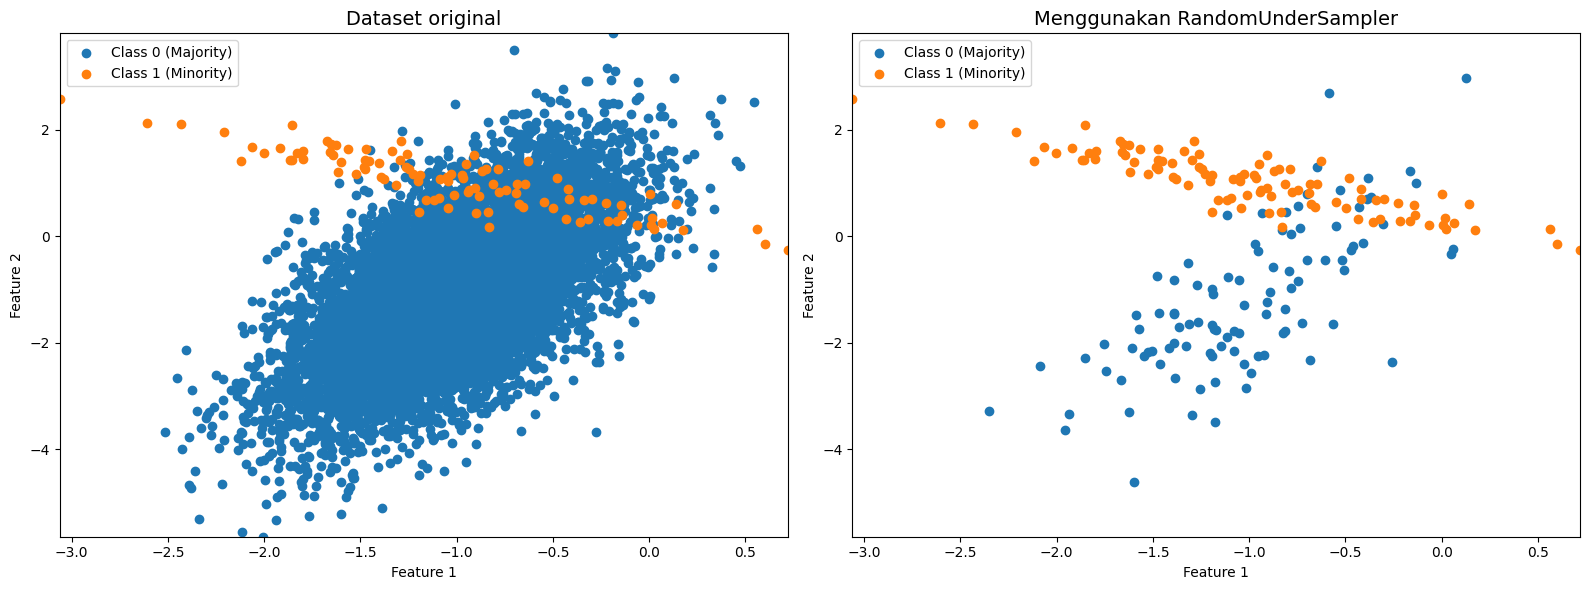

In [105]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_rand_under, y_rand_under, "Menggunakan RandomUnderSampler")

### Near Miss Undersampling

Near Miss Undersampling adalah salah satu metode undersampling yang memilih sample berdasarkan jarak antara samples di kelas mayoritas dengan samples di kelas minoritas. Ada beberapa varians dari Near Miss Undersampling ini, yaitu NearMiss-1, NearMiss-2, dan NearMiss-3.

#### NearMiss-1

Memilih sample dari kelas mayoritas yang memiliki jarak rata-rata terkecil terhadap tiga sample terdekat dari kelas minoritas.

In [106]:
# Definisi Near Miss 1 class
nearmiss = NearMiss()

# Resampling
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

Counter({np.int64(0): 100, np.int64(1): 100})


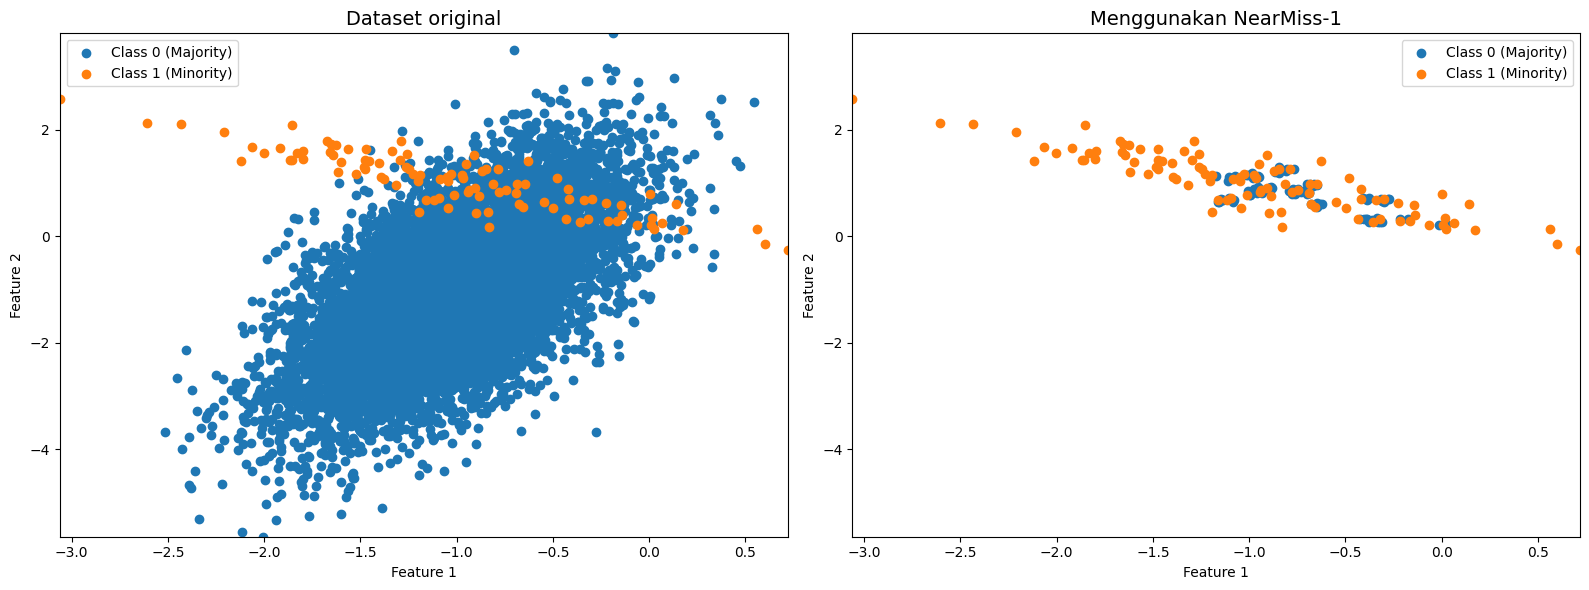

In [107]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_nearmiss, y_nearmiss, "Menggunakan NearMiss-1")

#### NearMiss-2

Memilih sample dari kelas mayoritas yang memiliki jarak rata-rata terkecil terhadap tiga sample terjauh dari kelas minoritas.

In [108]:
# Definisi Near Miss 2 class
nearmiss2 = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

Counter({np.int64(0): 100, np.int64(1): 100})


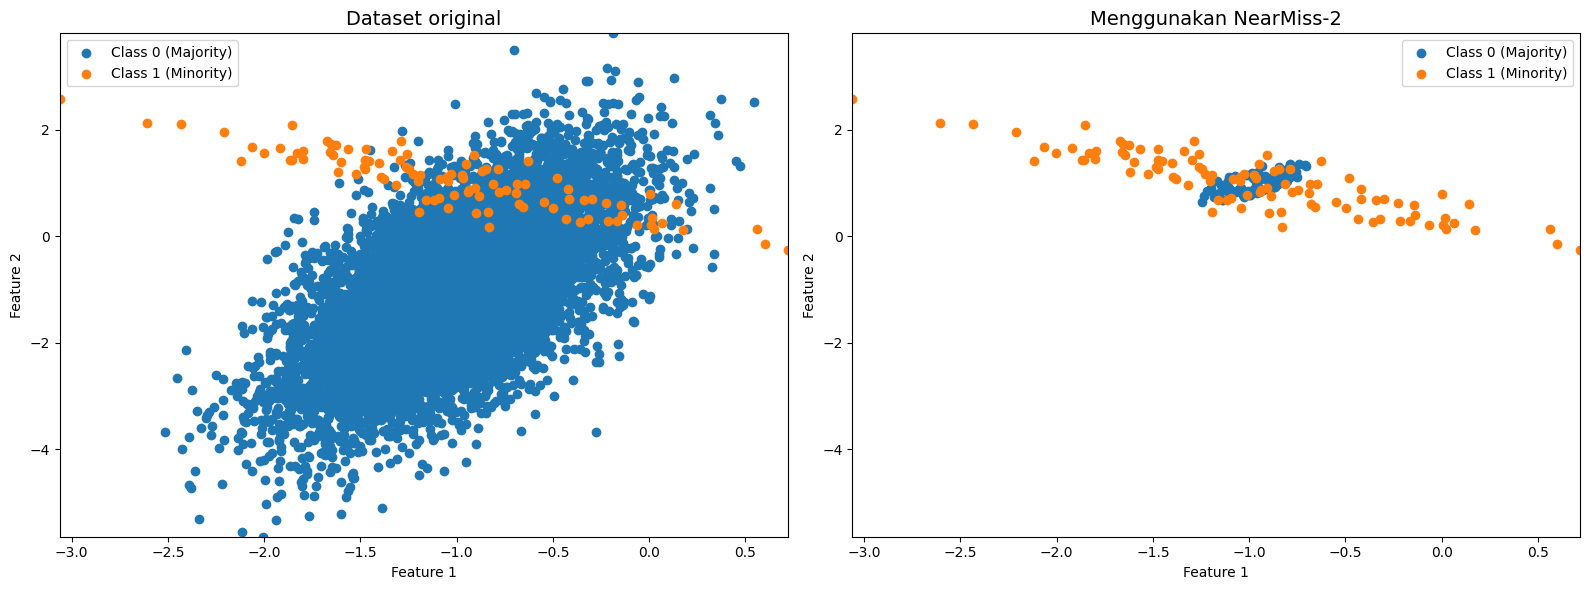

In [109]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_nearmiss2, y_nearmiss2, "Menggunakan NearMiss-2")

#### NearMiss-3

Memilih sample dari kelas mayoritas yang memiliki jarak terkecil ke setiap sample dari kelas minoritas.

In [110]:
# Definisi Near Miss 3 class
nearmiss3 = NearMiss(version=3)

# Resampling
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

Counter({np.int64(0): 100, np.int64(1): 100})


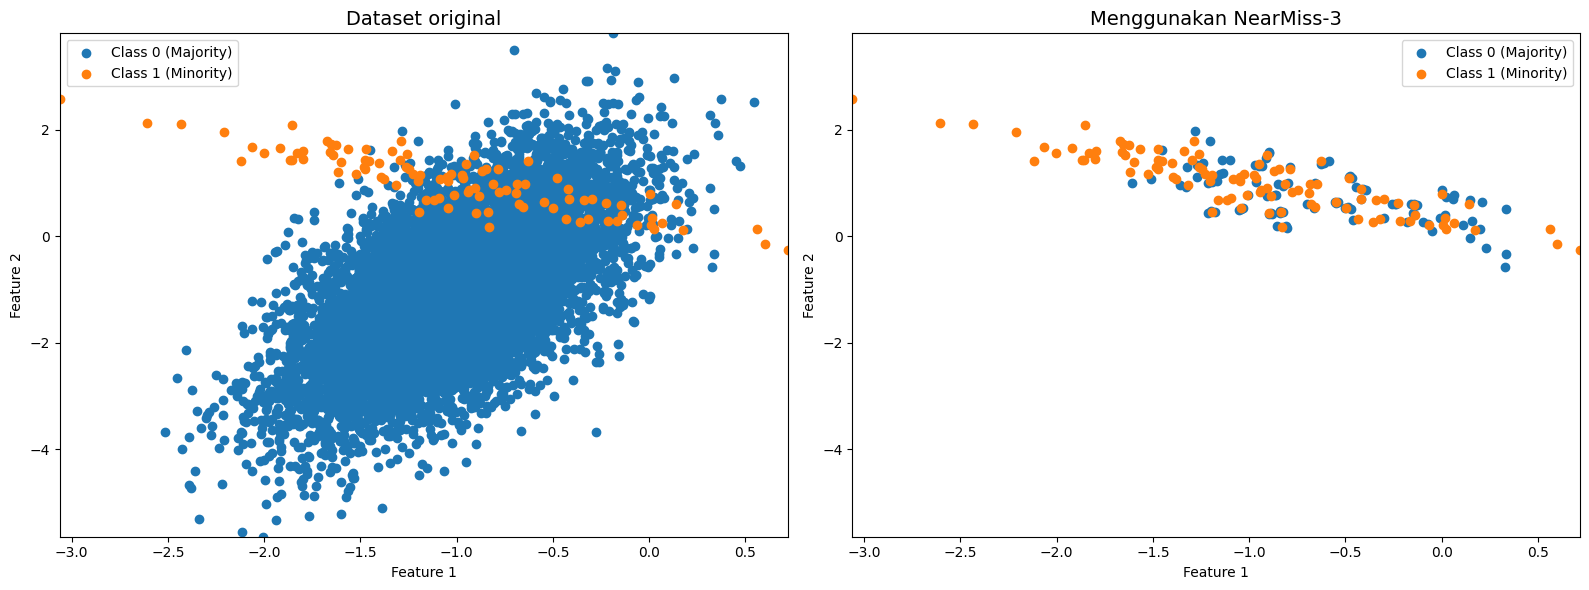

In [111]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_nearmiss3, y_nearmiss3, "Menggunakan NearMiss-3")

### Tomek Link Undersampling

Tomek Link Undersampling bekerja dengan cara mengidentifikasi dan menghapus sample dari kelas mayoritas yang merupakan Tomek Link. Tomek Link didefinisikan untuk pasangan sampel *a* dan *b* jika memenuhi kondisi berikut:
1. Tetangga terdekat *a* adalah *b*,
2. Tetangga terdekat *b* adalah *a*, dan
3. *a* dan *b* berasal dari kelas yang berbeda.

Artinya, *a* dan *b* adalah tetangga terdekat satu sama lain, tetapi berada pada kelas yang berbeda.

In [112]:
# Definisi Tomek Link class
tomek = TomekLinks()

# Resampling
X_tomek, y_tomek = tomek.fit_resample(X_severe, y_severe)

# Menunjukkan distribusi kelas pada dataset setelah resampling
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

Counter({np.int64(0): 9862, np.int64(1): 100})


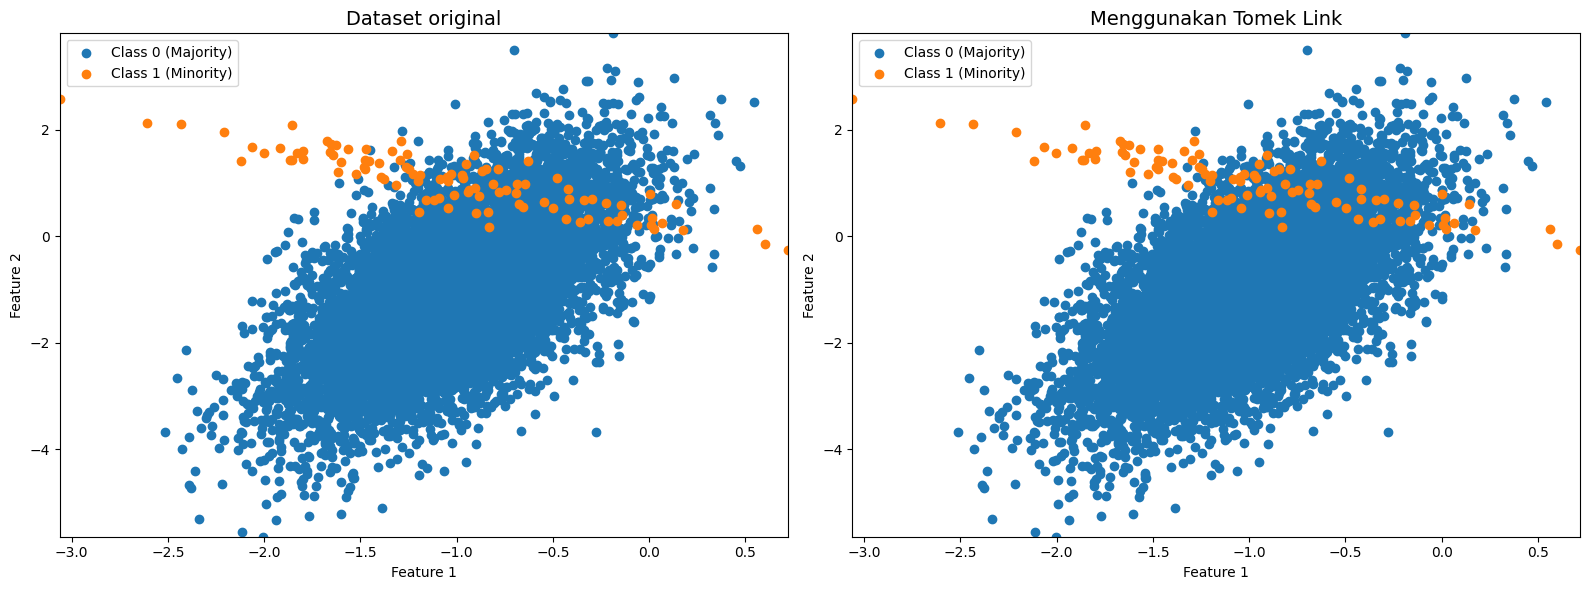

In [113]:
plot_datasets_for_comparison(X_severe, y_severe, "Dataset original", X_tomek, y_tomek, "Menggunakan Tomek Link")

Terlihat bahwa tidak ada perbedaan yang signifikan antara dataset original dengan dataset yang menggunakan Tomek Link Undersampling. Hal ini dikarenakan jumlah tomek links yang ditemukan sangat sedikit.

## Cost Sensitive Learning

Dalam dunia nyata, klasifikasi sering kali memiliki consequence yang berbeda-beda. Ambil contoh Bank loan problem dimana bank ingin menentukan apakah sebuah customer layak untuk diberikan pinjaman atau tidak. Jika Bank menolak pinjaman kepada customer yang baik/layak, dampaknya pada bank akan lebih kecil karena customer hanya akan merasa kecewa, sedangkan jika bank memberi pinjaman pada customer yang buruk (tidak mampu membayar hutangnya), maka dampak pada bank akan lebih besar karena bank akan kehilangan uang. Oleh karena itu, kita harus memberikan cost atau penalti yang beda untuk jenis kesalahan yang berbeda.

Cost Sensitive Learning memperhitungkan cost dari kesalahan prediksi. Setiap jenis kesalahan (misalnya, False Negative atau False Positive) akan diberikan cost yang berbeda. Dalam contoh sebelumnya, maka cost False positive (memberi pinjaman pada customer buruk) akan lebih besar daripada cost False negative (menolak pinjaman kepada customer yang baik). Berbeda dengan pendekatan tradisional dimana model berusaha meminimalkan kesalahan prediksi secara umum (menggunakan metrik seperti accuracy), dengan Cost Sensitive Learning, model akan berusaha meminimalkan cost total dengan memprioritaskan prediksi yang mengurangi kesalahan dengan cost tinggi.

Ada beberapa metode Cost Sensitive Learning yang relevan dalam kasus imbalance, salah satunya adalah dengan mendefinisikan kembali bobot dari sampel data agar memperhitungkan distribusi kelas yang imbalanced. Misalnya class 0 (kelas mayoritas) diberi bobot 1, sedangkan class 1 (kelas minoritas) diberi bobot 99. Metode lain melibatkan algoritma yang dirancang secara eksplisit untuk mempertimbangkan cost dari berbagai jenis kesalahan selama masa training. Ada juga metode yang menggabungkan beberapa model yang ditrain dengan mempertimbangkan cost kesalahan dan menggabungkan prediksi masing-masing model dengan tujuan meminimalkan cost kesalahan secara keseluruhan.

Selanjutnya, kita akan mencoba menerapkan Cost Sensitive Algorithm untuk menghandle problem imbalanced classification dengan model Decision Tree

### Cost Sensitive Decision Tree

Dengan menggunakan model Decision Tree yang pernah Anda pelajari sebelumnya, kita dapat menerapkan cost sensitive algorithm sebagai berikut. Mari kita lihat bagaimana performa model biasa pada dataset yang telah digenerate sebelumnya.

Pertama-tama, kita akan melihat kinerja model Decision Tree pada kasus imbalance tanpa mendefinisikan weight untuk masing-masing kelas

In [114]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9879
f1_macro score: 0.6933756229197872
precision_micro score: 0.9879
precision_macro score: 0.6999315145422763
recall_micro score: 0.9879
recall_macro score: 0.691969696969697


Kemudian, kita akan mengevaluasi decision tree yang diberikan pembobotan pada masing-masing kelasnya. Karena pada dataset ini class 0 memiliki 9900 sample dan class 1 memiliki 100 sample, maka kita akan mencoba memberi weights berdasarkan inverse dari distribusi kelasnya, yaitu memberi bobot 1 untuk class 0 dan bobot 99 untuk class 1. Perlu diperhatikan bahwa pemberian bobot tersebut mungkin tidak optimal karena bobot yang terlalu tinggi dapat menyebabkan model menjadi terlalu sensitif terhadap kelas minoritas.

In [115]:
weights = {0:1, 1:99}

decision_tree = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9892
f1_macro score: 0.6992952535799027
precision_micro score: 0.9894000000000001
precision_macro score: 0.7415394546690653
recall_micro score: 0.9893000000000001
recall_macro score: 0.6824747474747473


Terlihat adanya perbedaan pada skor macro yang menunjukkan bahwa penerapan cost sensitive learning pada decision tree berhasil memperbaiki sedikit klasifikasi model tersebut

# Neural Network

Neural Network (NN) adalah algoritma dalam machine learning yang meniru cara kerja neuron di otak manusia. Salah satu jenis Neural network yang populer untuk digunakan adalah Multi Layer Perceptron (MLP). MLP ini terdiri dari sejumlah perceptron yang disusun menjadi beberapa layer, yang mana masing-masing perceptron tersebut memiliki peran tertentu. Untuk mendapatkan gambaran yang baik terkait cara kerja algoritma ini, pertama-tama mari kita lihat arsitektur sederhana dari MLP pada kasus **Binary Classification**:

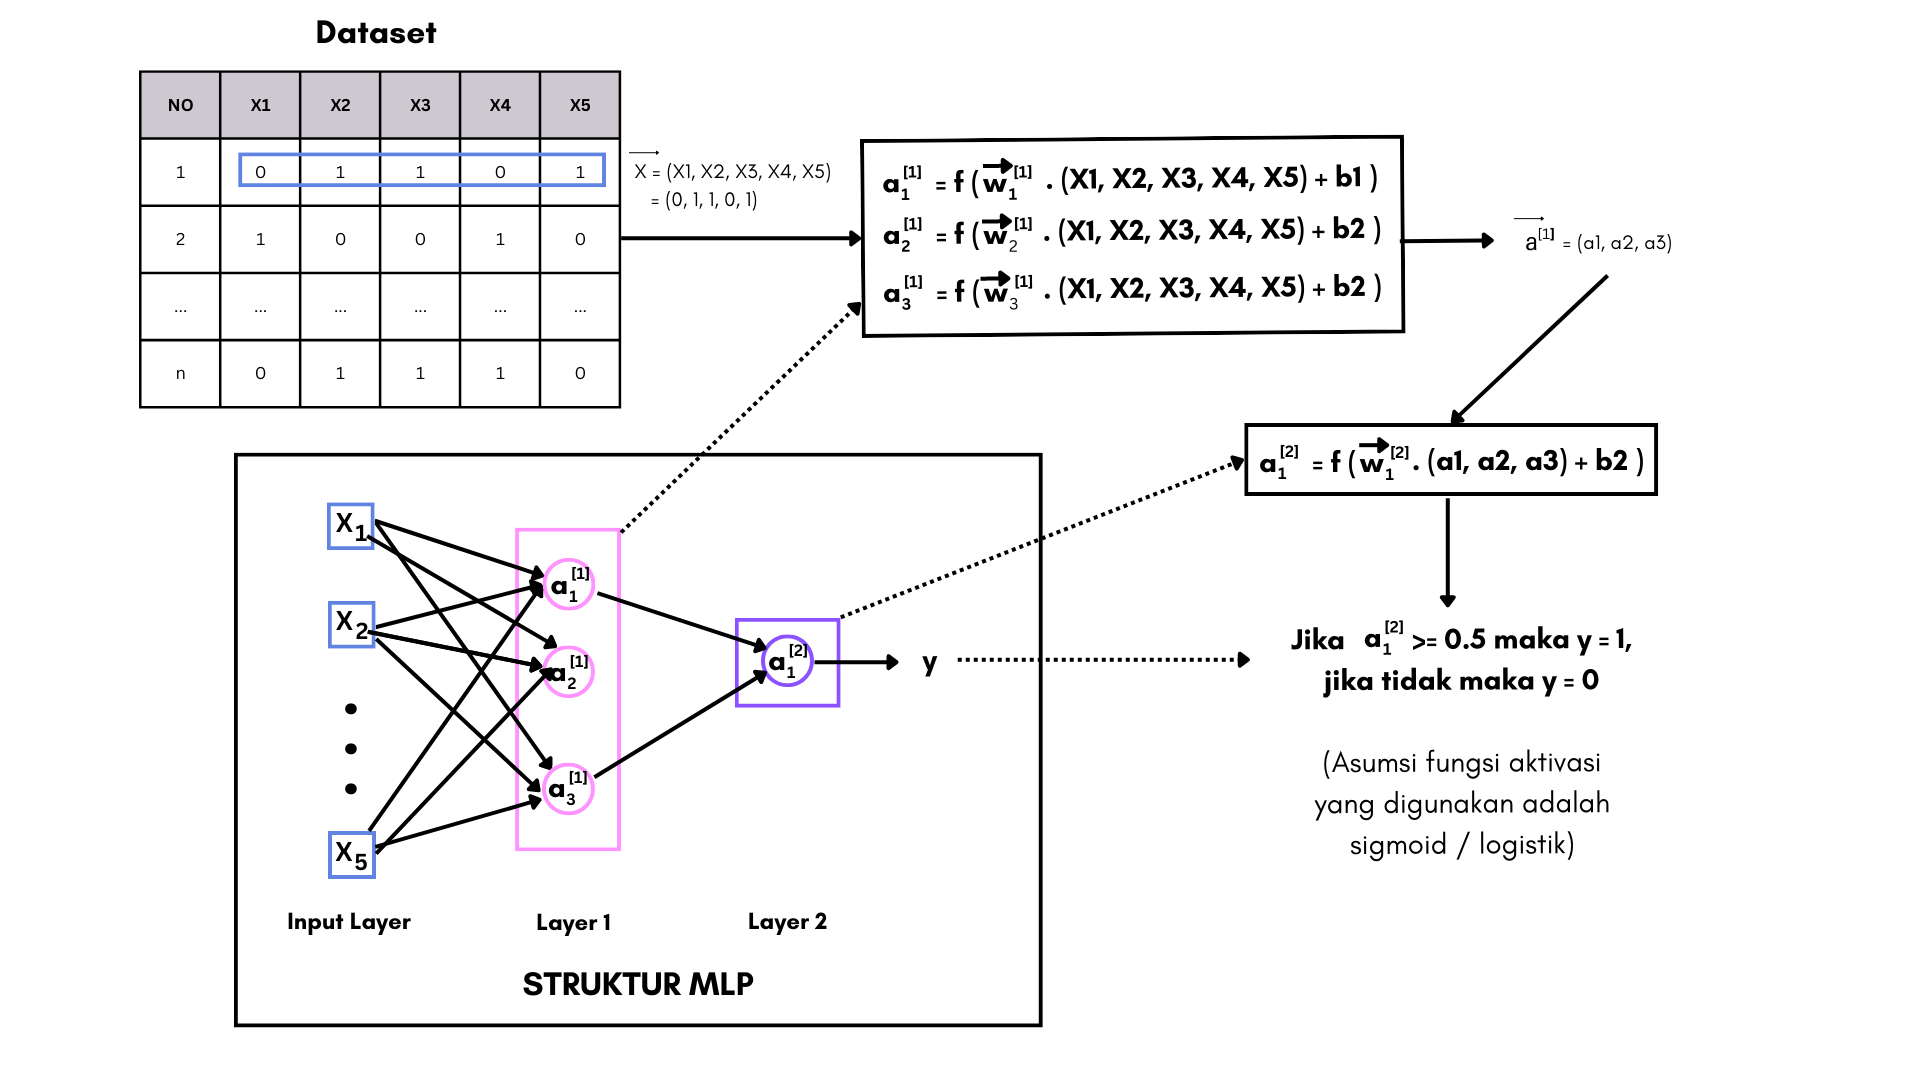

Struktur dasar MLP terdiri dari tiga jenis layer:
1. **Input Layer**: merupakan layer pertama yang memiliki jumlah neuron sesuai dengan jumlah fitur dalam dataset. Misalnya, jika terdapat lima fitur, maka input layer akan memiliki lima neuron.
2. **Hidden Layer**: merupakan layer yang terletak di antara input layer dan output layer. Layer ini berisi neuron-neuron komputasional yang menerima input dari layer sebelumnya, memprosesnya, dan mengirimkan hasilnya ke output layer atau hidden layer berikutnya. Pada gambar diatas, hanya terdapat 1 hidden layer yang digunakan, tetapi pada kenyataannya kita bisa menentukan jumlah dan size dari hidden layer yang kita inginkan sesuai kebutuhan kita.
3. **Output Layer**: merupakan layer terakhir yang menentukan hasil dari klasifikasi atau regresi. Pada kasus binary classification seperti gambar diatas, output layer biasanya hanya memiliki satu neuron dan jika menggunakan fungsi aktivasi sigmoid (logistik), maka output akan bernilai antara 0 hingga 1 dan akan ditentukan juga suatu threshold untuk menentukan class prediksi. Contohnya, jika hasil >= 0.5, maka output diklasifikasikan sebagai class 1, dan jika < 0.5, diklasifikasikan sebagai class 0.

Pada hidden layer, setiap neuron memiliki dua komponen utama:

1. **Weight (Bobot)**: merupakan parameter yang dikalikan dengan input dari layer sebelumnya. Weight ini menunjukkan "kekuatan" atau pengaruh masing-masing input pada neuron, yang mana nilainya akan ditentukan dan dioptimalkan selama proses training untuk meminimalkan loss function menggunakan algoritma tertentu, misalnya backpropagation.
2. **Bias**: merupakan sebuah konstanta tambahan yang digunakan untuk menyesuaikan output masing-masing neuron agar lebih sesuai dengan output yang diinginkan.

Neuron merupakan fungsi yang didefinisikan sebagai

![Neuron](https://i.imgur.com/ytS5Xf7.png)

dimana:
- vektor **x** = (x1, x2, ..., xn) merupakan input,
- vektor **w** = (w1, w2, ..., wn) disebut dengan bobot atau weights,
- konstanta *b* disebut dengan bias, dan
- fungsi *f* disebut dengan fungsi aktivasi. Ada banyak fungsi aktivasi yang dapat digunakan seperti pada gambar dibawah ini:

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Selanjutnya kita akan mencoba untuk membuat sebuah model MLPClassifier yang memiliki 2 hidden layer dimana masing-masing layer memiliki 30 dan 10 neuron berturut-turut. Selain itu, fungsi aktivasi yang digunakan adalah Rectified Linear Unit (ReLU).

In [116]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [117]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(mlp_classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9902
f1_macro score: 0.5165850675366084
precision_micro score: 0.9902
precision_macro score: 0.6950990495247623
recall_micro score: 0.9902
recall_macro score: 0.51


F1 macro score yang didapat tidak terlalu bagus mungkin karena model MLP digunakan pada dataset yang imbalance. Oleh karena itu, kita akan mencoba melakukan teknik resampling seperti yang sudah dipelajari sebelumnya, tetapi sekarang kita akan menerapkan pipeline untuk menggabungkan proses resampling dan training tersebut

# Pipeline

Pipeline dalam konteks machine learning adalah serangkaian langkah yang diatur secara berurutan untuk memproses data dan membangun suatu model. Langkah pemrosesan data yang bisa dilakukan dalam pipeline misalnya adalah mengisi missing value menggunakan suatu imputer, normalisasi atau standarisasi fitur (contohnya menggunakan standardscaler), dan encoding, tetapi tidak terbatas pada contoh-contoh tersebut saja. Dengan pipeline, kita dapat mengotomatisasi alur kerja dan memastikan setiap step yang dilakukan menjadi konsisten dan dapat direproduksi.

![Pipeline](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*mEO_PWFmOG_POqpf.png)

*Sumber: [Scikit-learn Pipelines Explained: Streamline and Optimize Your Machine Learning Processes](https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4)*

Dalam konteks imbalance classification, pipeline juga bisa digunakan untuk melakukan resampling pada dataset. Contoh berikutnya akan menunjukkan bagaimana kita dapat melakukan oversampling pada dataset dan kemudian membangun sebuah model MLPClassifier untuk menyelesaikan suatu problem classification menggunakan sebuah pipeline yang diimport dari `imblearn.pipeline`.

In [118]:
# Membuat pipeline
steps = [('over', SVMSMOTE(random_state=42)), ('model', mlp_classifier)]
pipeline = Pipeline(steps=steps)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9586
f1_macro score: 0.6253439012973351
precision_micro score: 0.9586


Bisa dilihat bahwa skor f1 macro nya berubah secara signifikan dari yang sebelumnya. Ini artinya proses oversampling berhasil dilakukan sebelum melakukan training pada model MLPClassifier, dan hasilnya lebih bagus daripada MLPClassifier yang digunakan pada dataset original.

# Soal

## Deskripsi Dataset

Dataset yang akan dipakai pada lab ini adalah dataset [Bank Customer Churn](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn) dengan sedikit modifikasi. Silahkan klik link tersebut untuk mengetahui penjelasan fitur-fiturnya.

Target variable pada dataset ini adalah `Exited`. Jumlah customer yang tidak meninggalkan bank (`Exited=0`) adalah 7962, sedangkan jumlah customer yang meninggalkan bank (`Exited=1`) adalah 159. Ini membuat dataset menjadi imbalance dan kalian akan mempraktikkan hal-hal yang sudah dipelajari di lab ini untuk menangani kasus imbalance tersebut.

In [ ]:
df=pd.read_csv('Customer-Churn-Records-v2.csv')

In [ ]:
df.info()

In [ ]:
df.head()

In [ ]:
df['Exited'].value_counts()

## 1. Imbalanced dataset

a) Buatlah sebuah dataset baru yang terdiri dari kolom `EstimatedSalary` dan kolom `Balance` sebagai fitur-fiturnya (X), dan kolom `Exited` sebagai target (y).

In [ ]:
# Menyiapkan data fitur (X) dan target (y) dengan cara yang berbeda tapi tetap efektif.
fitur = df[['EstimatedSalary', 'Balance']].values  # Ambil kolom EstimatedSalary & Balance
target = df['Exited'].values  # Ambil kolom Exited sebagai target


b) Hitung jumlah masing-masing target (Hint: Counter).

In [ ]:
from collections import Counter

# Hitung frekuensi masing-masing kelas dalam target (Exited)
counter = Counter(target)

# Tampilkan hasilnya
print(counter)


c) Visualisasikan dataset pada soal (1a) dengan scatter plot. Berikan warna yang berbeda untuk setiap kelasnya

In [ ]:
import matplotlib.pyplot as plt

# Set ukuran grafik supaya leluasa dilihat
plt.figure(figsize=(12, 10))

# Plot data dengan target 'Tidak Exit' (target == 0) sebagai titik biru
plt.scatter(fitur[target == 0][:, 0], fitur[target == 0][:, 1], label='Tidak Exit (0)', c='blue')

# Plot data dengan target 'Exit' (target == 1) sebagai titik merah
plt.scatter(fitur[target == 1][:, 0], fitur[target == 1][:, 1], label='Exit (1)', c='red')

# Tambahkan judul dan label sumbu
plt.title('Scatter Plot EstimatedSalary vs Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')

# Menampilkan legenda untuk label data
plt.legend()

# Tampilkan plot
plt.show()

d) Lengkapilah fungsi di bawah ini untuk melakukan oversampling pada setiap fold ketika melakukan cross validation pada suatu model menggunakan StratifiedKFold dengan k=5, shuffle=True, dan random_state=42. Tampilkan juga rata-rata skor accuracy, f1 macro, precision macro, dan recall macro.

Jalankan fungsi tersebut dengan menggunakan:
- DecisionTreeClassifier, dengan random_state=42
- Teknik oversampling RandomOversampler, dengan random_state=42
- X dan y yang didefinisikan pada soal (1a)

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [ ]:
def train_and_evaluate_with_oversampling(model, X, y, resample_method):
    # TODO: Gunakan StratifiedK-fold biasa (Ubah None menjadi jawaban)
    skf = None

    # TODO: Simpan hasil skor metrik setiap iterasi pada sebuah list

    # Iterasi untuk membagi fold mana yang menjadi training dan validation test dataset
    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]


        # TODO: Lakukan fit resample dari menggunakan variabel resample_method di parameter method ini (Ubah None menjadi jawaban)
        X_train_sampled, y_train_sampled = None

        model_clone = clone(model) # Cloning model untuk membuat model harus dilatih lagi untuk memprediksi di luar method ini

        # TODO: Lakukan fitting model dari hasil clone model dengan X dan y dataset yang sudah diresample

        # TODO: Prediksi kelas kategori menggunakan model yang telah dilatih di atas dengan menggunakan validation test dataset (Ubah None menjadi jawaban)
        y_pred = None

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        # TODO: Tambahkan hasil skor metrik ke dalam list yang bersesuaian


    # TODO: Hitung dan tampilkan mean dari setiap list skor metrik
    # Notes: ganti None dengan nama variabel list masing - masing metrik

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {None}')
    print(f'Mean F1-score (macro): {None}')
    print(f'Mean Precision (macro): {None}')
    print(f'Mean Recall (macro): {None}')

e) Jalankan kode di bawah ini. Apakah terdapat perbedaan skor dengan yang ada pada soal (1d)? Jika berbeda, mengapa hal tersebut bisa terjadi, dan approach manakah yang lebih tepat untuk dilakukan (approach (1d) atau (1e))?

In [ ]:
# Inisialisasi StratifiedKFold dan RandomOverSampler
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(fitur, target)

# Mendefinisikan skor yang ingin dihitung
scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']

# Menghitung dan menampilkan skor untuk setiap metrik
for score_type in scoring:
    score = cross_val_score(DecisionTreeClassifier(random_state=42), X_oversampled, y_oversampled, scoring=score_type, cv=cv, n_jobs=-1)
    print(f"{score_type} score: {np.mean(score)}")

Terdapat perbedaan skor antara pendekatan 1.d (oversampling di dalam loop cross-validation) dan 1.e (oversampling di luar loop cross-validation). Hal ini disebabkan oleh potensi data leakage pada pendekatan 1.e.

- Data Leakage

Pada pendekatan 1.e, data yang digunakan untuk oversampling juga digunakan untuk evaluasi di dalam cross-validation. Ini berarti model telah "melihat" sebagian data test selama proses training, sehingga hasil evaluasi menjadi bias.

- Pendekatan yang Lebih Tepat

Pendekatan 1.d lebih tepat untuk dilakukan karena mencegah data leakage. Oversampling hanya dilakukan pada data training di setiap fold, sehingga data test di fold tersebut tetap "unseen" dan dapat digunakan untuk evaluasi yang lebih valid.

- Kesimpulan

Pendekatan 1.d menghasilkan evaluasi model yang lebih realistis dan akurat karena menghindari data leakage. Oleh karena itu, pendekatan ini lebih disarankan untuk diterapkan dalam kasus imbalanced classification dengan cross-validation.

f) Mengapa StratifiedKFold umumnya lebih sering digunakan dalam kasus Imbalanced dataset dibandingkan KFold biasa? Jelaskan serta berikan sumber referensi anda.

**StratifiedKFold** lebih sering digunakan dalam kasus dataset yang tidak seimbang karena ia menjaga proporsi kelas di setiap fold selama cross-validation. Dengan kata lain, setiap fold akan memiliki distribusi kelas yang sama seperti dataset asli, sehingga mencegah bias yang bisa muncul jika menggunakan **KFold biasa**.

Pada **KFold biasa**, data dibagi secara acak tanpa mempertimbangkan distribusi kelas, yang bisa menyebabkan beberapa fold hanya berisi data dari kelas mayoritas (misalnya, `Exited=0`), dan kelas minoritas (misalnya, `Exited=1`) bisa terabaikan. Hal ini bisa bikin model nggak belajar dengan baik pada kelas minoritas, sehingga hasilnya nggak optimal, terutama pada metrik seperti **precision** atau **recall** untuk kelas minoritas.

**Kenapa StratifiedKFold Lebih Baik?**
- **Menghindari Bias**: Dengan mempertahankan distribusi proporsional kelas di setiap fold, StratifiedKFold memastikan model dilatih pada berbagai kombinasi data, mengurangi bias terhadap kelas mayoritas.
- **Lebih Akurat untuk Evaluasi**: Model lebih siap untuk memprediksi kelas minoritas dengan cara yang lebih representatif.

### Referensi
- **[StratifiedKFold Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)**: Menyatakan bahwa StratifiedKFold memastikan distribusi proporsi kelas terjaga pada setiap fold.
- **[Kaggle - Imbalanced Data](https://www.kaggle.com/learn/imbalanced-data)**: Mengajarkan kenapa cross-validation dengan stratified sampling itu penting untuk dataset imbalance.

## 2. Oversampling

a) Terapkan metode oversampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Melakukan resampling pada fitur dan target
X_sm, y_sm = smote.fit_resample(fitur, target)

# Menampilkan distribusi kelas setelah resampling
counter_y_sm = Counter(y_sm)
print("Distribusi kelas setelah SMOTE resampling:", counter_y_sm)

# Visualisasi hasil resampling dengan scatter plot
plt.figure(figsize=(12, 10))

# Scatter plot untuk data setelah resampling (class 0)
plt.scatter(X_sm[y_sm == 0][:, 0], X_sm[y_sm == 0][:, 1], label='Tidak Exit (0)', c='blue')

# Scatter plot untuk data setelah resampling (class 1)
plt.scatter(X_sm[y_sm == 1][:, 0], X_sm[y_sm == 1][:, 1], label='Exit (1)', c='red')

# Tambahkan judul dan label
plt.title('Scatter Plot Setelah SMOTE Resampling: EstimatedSalary vs Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()


b) Terapkan metode oversampling yang lain yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import matplotlib.pyplot as plt

# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Melakukan resampling pada fitur dan target menggunakan RandomOverSampler
X_ros, y_ros = ros.fit_resample(fitur, target)

# Menampilkan distribusi kelas setelah resampling
counter_y_ros = Counter(y_ros)
print("Distribusi kelas setelah RandomOverSampler resampling:", counter_y_ros)

# Visualisasi hasil resampling dengan scatter plot
plt.figure(figsize=(12, 10))

# Scatter plot untuk data setelah resampling (class 0)
plt.scatter(X_ros[y_ros == 0][:, 0], X_ros[y_ros == 0][:, 1], label='Tidak Exit (0)', c='blue')

# Scatter plot untuk data setelah resampling (class 1)
plt.scatter(X_ros[y_ros == 1][:, 0], X_ros[y_ros == 1][:, 1], label='Exit (1)', c='red')

# Tambahkan judul dan label
plt.title('Scatter Plot Setelah RandomOverSampler Resampling: EstimatedSalary vs Balance')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')

# Tampilkan legenda
plt.legend()

# Tampilkan plot
plt.show()


c) Adakah perbedaan yang Anda temukan dari pengamatan terhadap data hasil kedua metode oversampling yang Anda pilih? Jika ada, jelaskan mengapa perbedaan tersebut bisa terjadi! Sertakan sumber referensi anda

### Perbedaan antara **SMOTE** dan **RandomOverSampler** dalam Oversampling

1. **Metode Oversampling**:
   - **SMOTE** menghasilkan **data sintetis** dengan interpolasi antara titik data minoritas. Data baru lebih bervariasi.
   - **RandomOverSampler** **menduplikasi** titik data minoritas yang ada secara acak tanpa perubahan pada data.

2. **Distribusi Data**:
   - **SMOTE** membuat distribusi data minoritas lebih merata dan tersebar di ruang fitur.
   - **RandomOverSampler** membuat distribusi data minoritas lebih terkonsentrasi pada titik yang sudah ada.

3. **Pengaruh terhadap Model**:
   - **SMOTE** membantu model belajar pola yang lebih umum dan mengurangi risiko overfitting.
   - **RandomOverSampler** meningkatkan risiko overfitting karena data minoritas hanya diduplikasi.

4. **Visualisasi**:
   - **SMOTE** menghasilkan data minoritas yang lebih tersebar dan bervariasi.
   - **RandomOverSampler** menghasilkan data minoritas yang lebih padat di sekitar titik yang ada.

5. **Kelebihan & Kekurangan**:
   - **SMOTE**: Mengurangi overfitting, lebih generalis, tapi lebih kompleks.
   - **RandomOverSampler**: Sederhana, cepat, tapi bisa menyebabkan overfitting karena duplikasi data.

### Kesimpulan
- Gunakan **SMOTE** jika ingin data lebih bervariasi dan mengurangi overfitting.
- Gunakan **RandomOverSampler** jika ingin solusi yang lebih cepat dan sederhana.

### Referensi:
- **[SMOTE - Wikipedia](https://en.wikipedia.org/wiki/SMOTE)**
- **[RandomOverSampler - Imbalanced-learn Documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)**


d) Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menggunakan metode oversampling yang dipakai pada (2a)
- Model kedua menggunakan metode oversampling yang dipakai pada (2b)
- Metrik utama yang digunakan adalah f1 macro.
- Oversampling dilakukan pada setiap fold cross validation

Petunjuk: Kalian bisa menggunakan cara 1d untuk menjawab soal ini.

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [ ]:
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Inisialisasi StratifiedKFold dengan k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Definisikan oversampling metode
smote = SMOTE(random_state=42)
ros = RandomOverSampler(random_state=42)

# Model pertama menggunakan SMOTE
scores_smote = []
for train_idx, val_idx in cv.split(fitur, target):
    # Split data menjadi train dan validation set
    X_train, X_val = fitur[train_idx], fitur[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Oversampling pada data training menggunakan SMOTE
    X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
    
    # Latih model Decision Tree dan evaluasi dengan f1_macro
    model = DecisionTreeClassifier(random_state=42)
    score = model.fit(X_train_sm, y_train_sm).score(X_val, y_val)
    scores_smote.append(score)

# Model kedua menggunakan RandomOverSampler
scores_ros = []
for train_idx, val_idx in cv.split(fitur, target):
    # Split data menjadi train dan validation set
    X_train, X_val = fitur[train_idx], fitur[val_idx]
    y_train, y_val = target[train_idx], target[val_idx]
    
    # Oversampling pada data training menggunakan RandomOverSampler
    X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
    
    # Latih model Decision Tree dan evaluasi dengan f1_macro
    model = DecisionTreeClassifier(random_state=42)
    score = model.fit(X_train_ros, y_train_ros).score(X_val, y_val)
    scores_ros.append(score)

# Menampilkan hasil cross-validation untuk kedua model
print("F1 Macro score dengan SMOTE: ", np.mean(scores_smote))
print("F1 Macro score dengan RandomOverSampler: ", np.mean(scores_ros))


e) Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

### Perbandingan Skor F1 Macro: **SMOTE** vs **RandomOverSampler**

- **Skor F1 Macro**:
  - **SMOTE**: 0.719
  - **RandomOverSampler**: 0.964

#### Mengapa RandomOverSampler Lebih Baik?
1. **RandomOverSampler** menduplikasi data minoritas, yang meningkatkan jumlah data yang ada tanpa mengubah distribusi kelas. Ini membuat model lebih mudah "belajar" pola dari data yang sama.
2. **SMOTE** menghasilkan data sintetis yang mungkin terlalu jauh dari distribusi asli, yang dapat mengurangi akurasi pada model, terutama jika data asli memiliki noise.
3. **Overfitting**: RandomOverSampler berisiko **overfitting**, namun dalam kasus ini membantu model belajar lebih baik karena data minoritas yang lebih banyak.
4. **F1 Score** lebih tinggi pada RandomOverSampler karena recall yang lebih baik pada kelas minoritas, meskipun precision bisa terpengaruh.

#### Kesimpulan:
- **RandomOverSampler** lebih baik dalam meningkatkan **F1 Macro** karena duplikasi data yang membantu model menangkap pola minoritas lebih efektif.
- **SMOTE** lebih baik untuk **menghindari overfitting** dan lebih cocok untuk dataset yang lebih kompleks dan besar.

#### Referensi:
- [SMOTE - Wikipedia](https://en.wikipedia.org/wiki/SMOTE)
- [RandomOverSampler - Imbalanced-learn Documentation](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html)


## 3. Undersampling

a) Terapkan metode undersampling yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt

# Inisialisasi RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resampling data
X_resampled, y_resampled = rus.fit_resample(fitur, target)

# Menunjukkan distribusi kelas setelah undersampling
from collections import Counter
counter_y_resampled = Counter(y_resampled)
print("Distribusi kelas setelah undersampling:", counter_y_resampled)

# Visualisasi scatter plot hasil undersampling
plt.figure(figsize=(12, 10))
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Tidak Exit (0)', c='blue')  # Kelas 0
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Exit (1)', c='red')  # Kelas 1
plt.title('Scatter Plot Setelah Undersampling')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.legend()
plt.show()


b) Terapkan metode undersampling yang lain yang telah dipelajari pada lab ini pada dataset soal (1a). Visualisasikan scatter plot hasil resampling datasetnya

In [ ]:
from imblearn.under_sampling import ClusterCentroids
import matplotlib.pyplot as plt
from collections import Counter

# Inisialisasi ClusterCentroids
cc = ClusterCentroids(random_state=42)

# Resampling data
X_resampled_cc, y_resampled_cc = cc.fit_resample(fitur, target)

# Menunjukkan distribusi kelas setelah undersampling
counter_y_resampled_cc = Counter(y_resampled_cc)
print("Distribusi kelas setelah undersampling dengan ClusterCentroids:", counter_y_resampled_cc)

# Visualisasi scatter plot hasil undersampling dengan ClusterCentroids
plt.figure(figsize=(12, 10))
plt.scatter(X_resampled_cc[y_resampled_cc == 0][:, 0], X_resampled_cc[y_resampled_cc == 0][:, 1], label='Tidak Exit (0)', c='blue')  # Kelas 0
plt.scatter(X_resampled_cc[y_resampled_cc == 1][:, 0], X_resampled_cc[y_resampled_cc == 1][:, 1], label='Exit (1)', c='red')  # Kelas 1
plt.title('Scatter Plot Setelah Undersampling dengan ClusterCentroids')
plt.xlabel('EstimatedSalary')
plt.ylabel('Balance')
plt.legend()
plt.show()


c) Berdasarkan visualisasi scatter plot kedua dataset hasil resampling pada soal (3a) dan (3b) yang Anda pilih, apa perbedaan yang terlihat? Jelaskan juga mengapa perbedaan tersebut bisa terjadi! Jangan lupa sertakan sumber referensi anda

### Perbedaan Visualisasi Scatter Plot antara **RandomUnderSampler** dan **ClusterCentroids**

Berdasarkan dua scatter plot hasil resampling yang diterapkan pada dataset, kita dapat mengamati perbedaan signifikan dalam distribusi titik data antara kedua metode **undersampling** yang digunakan:

#### 1. **RandomUnderSampler (3a)**
- **Distribusi titik data**: Titik data untuk kelas mayoritas (kelas 0) akan tersebar secara acak, dengan sebagian besar titik data dari kelas mayoritas dihapus.
- **Pola**: Setelah undersampling, Anda akan melihat bahwa titik data kelas mayoritas tersebar secara tidak terstruktur, karena titik data yang dihapus adalah titik yang dipilih secara acak.

#### 2. **ClusterCentroids (3b)**
- **Distribusi titik data**: Alih-alih menghapus titik data secara acak, **ClusterCentroids** menggantikan titik-titik dari kelas mayoritas dengan **centroid** dari cluster yang terbentuk. Titik-titik ini lebih terstruktur dan lebih representatif dari keseluruhan kelas mayoritas.
- **Pola**: Setelah undersampling dengan **ClusterCentroids**, titik data kelas mayoritas akan lebih terkonsentrasi di sekitar centroid cluster yang terbentuk, menciptakan distribusi yang lebih padat dan terpusat.

---

### Mengapa Perbedaan Ini Bisa Terjadi?

#### 1. **RandomUnderSampler**:
- **Metode**: Memilih secara acak titik data dari kelas mayoritas dan menghapusnya. Proses ini tidak mempertimbangkan pola atau struktur data dalam kelas mayoritas, sehingga beberapa informasi penting mungkin hilang.
- **Kekurangan**: Menghapus data secara acak dapat mengakibatkan kehilangan informasi yang berharga dan mungkin membuat model lebih sulit untuk mempelajari pola dari kelas mayoritas.

#### 2. **ClusterCentroids**:
- **Metode**: Menggunakan algoritma clustering (biasanya KMeans) untuk mengelompokkan data kelas mayoritas, kemudian menggantikan titik-titik tersebut dengan centroid dari cluster. Ini memungkinkan model untuk tetap mempelajari pola yang lebih representatif dari kelas mayoritas tanpa kehilangan informasi penting.
- **Keuntungan**: Proses ini lebih efisien dalam mempertahankan informasi penting dari kelas mayoritas dan menghindari overfitting yang bisa terjadi jika terlalu banyak titik data yang dihapus secara acak.

---

### Penjelasan Perbedaan:
- **RandomUnderSampler** berisiko menghapus titik data yang penting, yang dapat merusak representasi keseluruhan kelas mayoritas.
- **ClusterCentroids** lebih bijaksana karena menggantikan titik data dengan pusat-pusat cluster, sehingga distribusi kelas mayoritas tetap terjaga, namun tidak berisiko terlalu banyak data kelas mayoritas yang tersisa.

---

### Kesimpulan:
- **ClusterCentroids** menghasilkan distribusi data yang lebih padat dan terstruktur karena menggantikan titik data dengan centroid cluster. Ini cenderung memberikan hasil yang lebih representatif dibandingkan dengan **RandomUnderSampler**, yang secara acak menghapus titik data kelas mayoritas dan berisiko kehilangan pola-pola penting.

---

### Referensi:
- **RandomUnderSampler**: [Imbalanced-learn Documentation - RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html)
- **ClusterCentroids**: [Imbalanced-learn Documentation - ClusterCentroids](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.ClusterCentroids.html)


d) Lakukan cross validation menggunakan StratifiedKFold dengan k=5 pada 2 buah model Decision Tree yang berbeda dengan ketentuan berikut:
- Model pertama menerima dataset pada soal (3a)
- Model kedua menerima dataset pada soal (3b)
- Metrik utama yang digunakan adalah f1 macro.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids
import numpy as np

# Membaca dataset (asumsi df sudah ada)
X = df[['EstimatedSalary', 'Balance']].to_numpy()  # fitur
y = df['Exited'].to_numpy()  # target

# Membuat StratifiedKFold dengan k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model pertama menggunakan RandomUnderSampler (3a)
ros = RandomUnderSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)

# Model kedua menggunakan ClusterCentroids (3b)
cc = ClusterCentroids(random_state=42)
X_cc, y_cc = cc.fit_resample(X, y)

# Menilai model pertama dengan RandomUnderSampler menggunakan f1_macro
scores_ros = cross_val_score(DecisionTreeClassifier(random_state=42), 
                             X_ros, y_ros, 
                             scoring='f1_macro', 
                             cv=cv, 
                             n_jobs=-1)
print(f"F1 Macro score dengan RandomUnderSampler: {np.mean(scores_ros)}")

# Menilai model kedua dengan ClusterCentroids menggunakan f1_macro
scores_cc = cross_val_score(DecisionTreeClassifier(random_state=42),
                             X_cc, y_cc,
                             scoring='f1_macro',
                             cv=cv,
                             n_jobs=-1)
print(f"F1 Macro score dengan ClusterCentroids: {np.mean(scores_cc)}")


e) Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.


#### Hasil:
- **F1 Macro score dengan RandomUnderSampler**: 0.514
- **F1 Macro score dengan ClusterCentroids**: 0.488

##### Penjelasan:
Metode yang memberikan skor **F1 Macro** tertinggi adalah **RandomUnderSampler** dengan skor **0.514**, dibandingkan dengan **ClusterCentroids** yang memiliki skor **0.488**. Berikut adalah beberapa alasan mengapa hal ini bisa terjadi:

1. **RandomUnderSampler** bekerja dengan cara menghapus secara acak sebagian besar data dari kelas mayoritas, sehingga distribusi data menjadi lebih seimbang. Dengan distribusi kelas yang lebih seimbang, model dapat lebih fokus untuk membedakan antara kelas mayoritas dan kelas minoritas. Ini mempermudah model dalam belajar pola dari kedua kelas, yang tercermin dalam peningkatan **F1 Macro** score.

2. **ClusterCentroids** menggunakan teknik **clustering** untuk menggantikan data kelas mayoritas dengan **centroid** dari cluster yang terbentuk. Meskipun ini menjaga representasi kelas mayoritas, pendekatan ini mungkin tidak sepenuhnya mencerminkan keragaman dalam kelas mayoritas karena data kelas mayoritas digantikan dengan titik pusat cluster yang lebih homogen. Akibatnya, model mungkin kesulitan dalam menangkap pola yang lebih kompleks pada kelas mayoritas, yang mengurangi skor **F1 Macro**.

3. **F1 Macro** adalah metrik yang mengukur keseimbangan antara presisi dan recall untuk masing-masing kelas. Jika model kesulitan mendeteksi kelas minoritas atau tidak belajar pola yang cukup baik, maka skor **F1 Macro** bisa lebih rendah. **RandomUnderSampler** dengan menghapus data acak bisa memberikan model lebih banyak kesempatan untuk fokus pada kedua kelas yang lebih seimbang, sementara **ClusterCentroids** bisa mengurangi variasi dalam kelas mayoritas, yang menghambat kemampuan model dalam belajar.

##### Kesimpulan:
**RandomUnderSampler** memberikan hasil **F1 Macro** yang lebih baik karena lebih efektif dalam menjaga keseimbangan antara kelas tanpa mengurangi variasi dalam kelas mayoritas. Sementara itu, **ClusterCentroids** cenderung mengurangi variasi dalam kelas mayoritas, yang dapat merugikan model dalam mendeteksi pola penting dalam kelas tersebut.


## 4. Cost-Sensitive Learning

a) Buatlah beberapa model decision tree dengan random_state=42 yang menerima dataset soal (1a) dan dengan weight yang berbeda, yaiu:
- tanpa weights
- weights = {0: 1, 1: 2}
- weights = {0: 1, 1: 99}

Lakukan train_test_split dengan ketentuan berikut:
- menggunakan X dan y dari soal (1a)
- stratify=y
- random_state=42
- test_size=0.2

Kemudian, lakukan fit predict pada model dengan weights yang berbeda, kemudian tampilkan skor f1 macro dan juga confusion matrix untuk masing-masing model DT dengan weights yang berbeda tersebut. Confusion matrix yang tidak diberi label akan mendapat pengurangan nilai

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model tanpa weights
model_no_weights = DecisionTreeClassifier(random_state=42)

# Model dengan weights {0: 1, 1: 2}
model_weights_2 = DecisionTreeClassifier(class_weight={0:1, 1:2}, random_state=42)

# Model dengan weights {0: 1, 1: 99}
model_weights_99 = DecisionTreeClassifier(class_weight={0:1, 1:99}, random_state=42)


In [ ]:
from sklearn.metrics import f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk mencetak skor dan confusion matrix
def evaluate_model(model, X_train, X_test, y_train, y_test, description):
    model.fit(X_train, y_train)  # Pelatihan
    y_pred = model.predict(X_test)  # Prediksi

    # Hitung F1-score (macro)
    f1 = f1_score(y_test, y_pred, average="macro")

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Tampilkan hasil
    print(f"{description}:")
    print(f"F1 Macro Score: {f1:.4f}")
    print("-" * 30)

# Fungsi untuk menampilkan confusion matrix dengan label
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [ ]:
# Evaluasi Model Tanpa Weight
evaluate_model(model_no_weights, X_train, X_test, y_train, y_test, "Model tanpa weights")

#CM untuk Model Tanpa Weight
y_pred_no_weights = model_no_weights.predict(X_test)
cm_no_weights = confusion_matrix(y_test, y_pred_no_weights)
plot_confusion_matrix(cm_no_weights, classes=['Class 0', 'Class 1'], title="Confusion Matrix: Model Tanpa Weights")

In [ ]:
# Evaluasi Model dengan weights {0: 1, 1: 2}:
evaluate_model(model_weights_2, X_train, X_test, y_train, y_test, "Model dengan weights {0: 1, 1: 2}")

#CM untuk Model dengan weights {0: 1, 1: 2}:
y_pred_weights_2 = model_weights_2.predict(X_test)
cm_weights_2 = confusion_matrix(y_test, y_pred_weights_2)
plot_confusion_matrix(cm_weights_2, classes=['Class 0', 'Class 1'], title="Confusion Matrix: Model dengan Weights 2")

In [ ]:
# Evaluasi Model dengan weights {0: 1, 1: 2}:
evaluate_model(model_weights_2, X_train, X_test, y_train, y_test, "Model dengan weights {0: 1, 1: 2}")

#CM untuk Model dengan weights {0: 1, 1: 2}:
y_pred_weights_2 = model_weights_2.predict(X_test)
cm_weights_2 = confusion_matrix(y_test, y_pred_weights_2)
plot_confusion_matrix(cm_weights_2, classes=['Class 0', 'Class 1'], title="Confusion Matrix: Model dengan Weights 2")

b) Berdasarkan jawaban pada soal (4a), Apakah terdapat perbedaan pada confusion matrix dan score f1 macro masing-masing weights? Jelaskan.

Terdapat perbedaan hasil dari perbandingan weight ini, namun tidaklah perbedaan yang signifikan. Bisa dilihat penjelasannya:

Confusion Matrix:
- Tanpa Weight : Model cenderung memprediksi kelas mayoritas, dengan tidak ada prediksi benar untuk kelas minoritas (TP = 0).
- Weight (0:1, 1:2) : Perubahan kecil, TN menurun dan FP meningkat, tetapi kelas minoritas tetap tidak dikenali (TP = 0).
- Weight (0:1, 1:99) : Bobot tinggi untuk kelas minoritas mengurangi TN dan meningkatkan FP, namun tetap gagal mengenali kelas minoritas. Jadi tidak ada prediksi benar untuk kelas 1 di semua kasus. Perbedaan hanya terjadi pada distribusi prediksi salah untuk kelas mayoritas (kelas 0), tetapi tidak memperbaiki prediksi pada kelas minoritas.

Skor F1 Macro:
- Tanpa Weight: Skor F1 macro tertinggi, model lebih optimal tanpa bobot tambahan.
- Weight (0:1, 1:2): Skor sedikit menurun karena penyesuaian bobot tidak signifikan.
- Weight (0:1, 1:99) : Skor terendah, bobot tinggi membuat model kurang optimal.


Perubahan weights tidak memberikan peningkatan performa yang signifikan karena model tidak cukup "belajar" dari kelas minoritas. Hal ini kemungkinan karena data masih sangat imbalance, atau model yang digunakan tidak cukup kompleks untuk menangani perbedaan kelas dengan hanya mengandalkan weights.

## 5. Neural Network dan Pipeline

a) Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 40, dan 20 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [ ]:
from sklearn.neural_network import MLPClassifier

# Membuat model MLPClassifier dengan spesifikasi yang diminta
mlp_model_1 = MLPClassifier(
    hidden_layer_sizes=(50, 40, 20),
    random_state=42
)


b) Buatlah sebuah model MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 80 berturut - turut
- Menggunakan random_state=42
- Abaikan hyperparameter lain

In [ ]:
# Membuat model MLPClassifier dengan spesifikasi yang diminta
mlp_model_2 = MLPClassifier(
    hidden_layer_sizes=(100, 80),
    random_state=42
)

c) Lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 terhadap kedua model MLP pada soal (5a) dan (5b) memakai X dan y yang didefinisikan pada soal (1a). Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [ ]:
from sklearn.metrics import make_scorer, f1_score

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "f1_micro": make_scorer(f1_score, average="micro")
}

In [ ]:
from sklearn.metrics import make_scorer, f1_score

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "f1_micro": make_scorer(f1_score, average="micro")
}


# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "f1_micro": make_scorer(f1_score, average="micro")
}

d) Apakah terdapat perbedaan skor metrik makro evaluasi model pada soal (5c)? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!

## Perbandingan Skor Metrik Makro antara Model 5a dan Model 5b

### Hasil Skor:
- **F1 Makro**:
  - **Model 5a (50, 40, 20)**: 0.4917
  - **Model 5b (100, 80)**: 0.4915
- **F1 Mikro**:
  - **Model 5a (50, 40, 20)**: 0.9635
  - **Model 5b (100, 80)**: 0.9628

### Analisis Perbedaan:
Meskipun perbedaan skornya kecil, hal ini tetap bisa dijelaskan oleh perbedaan hyperparameter pada kedua model, seperti jumlah hidden layer dan jumlah neuron per layer.

1. **Jumlah Hidden Layer**:
   - **Model 5a** memiliki **3 hidden layer**, yang memberikan kompleksitas lebih tinggi dibandingkan **Model 5b** yang hanya memiliki **2 hidden layer**.
   - Kompleksitas yang lebih tinggi pada **Model 5a** memungkinkan model untuk sedikit lebih baik dalam mempelajari pola-pola rumit pada data, sehingga menghasilkan skor **F1 Makro** dan **F1 Mikro** yang lebih tinggi.

2. **Jumlah Neuron per Layer**:
   - **Model 5b** memiliki jumlah neuron yang lebih besar di setiap layer dibandingkan **Model 5a**.
   - Namun, skor metrik makro tidak menunjukkan peningkatan signifikan. Hal ini mungkin menunjukkan bahwa dataset yang digunakan tidak cukup kompleks untuk memanfaatkan kapasitas representasi yang lebih besar pada **Model 5b**.
   - Selain itu, penyesuaian hyperparameter lain (seperti **learning rate** atau **jumlah epoch**) mungkin diperlukan untuk mengoptimalkan performa **Model 5b**.

### Kesimpulan:
- **Model 5a (50, 40, 20)** dengan **3 hidden layer** menunjukkan performa yang sedikit lebih baik dibandingkan dengan **Model 5b (100, 80)** dengan **2 hidden layer**.
- Kompleksitas yang lebih tinggi pada Model 5a memungkinkan model mempelajari pola yang lebih rumit dalam data, yang tercermin pada skor **F1 Makro** dan **F1 Mikro** yang lebih tinggi.
- Kapasitas representasi Model 5b yang lebih besar tidak memberikan peningkatan performa yang signifikan, kemungkinan karena dataset tidak cukup kompleks atau diperlukan penyesuaian hyperparameter lainnya.

---


e) Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu oversampling menggunakan SMOTE dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Pipeline dengan langkah-langkah: SMOTE -> MLPClassifier
pipeline = ImbPipeline([
    ("smote", SMOTE(random_state=42)),
    ("mlp", mlp_model_1)
])

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "f1_micro": make_scorer(f1_score, average="micro")
}

# Cross-validation untuk F1 Macro
scores_f1_macro = cross_val_score(
    pipeline, X, y, cv=skf, scoring=scoring["f1_macro"]
)

# Cross-validation untuk F1 Micro
scores_f1_micro = cross_val_score(
    pipeline, X, y, cv=skf, scoring=scoring["f1_micro"]
)

# Menampilkan hasil rata-rata
print("Hasil Evaluasi Pipeline:")
print(f"Rata-rata F1 Macro: {scores_f1_macro.mean():.4f}")
print(f"Rata-rata F1 Micro: {scores_f1_micro.mean():.4f}")

f) Dengan menggunakan Pipeline, lakukan cross validation menggunakan **Stratified K-fold** dengan k=5 dan random_state=42 pada sebuah pipeline yang berisi steps yaitu undersampling menggunakan RandomUnderSampler dengan random_state=42 dan menggunakan model MLP yang memiliki performa lebih bagus dari soal (5a) dan (5b). Gunakan X dan y yang didefinisikan pada soal (1a) untuk melakukan cross validation. Metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline

# Pipeline dengan langkah-langkah: SMOTE -> MLPClassifier
pipeline = ImbPipeline([
    ("undersample", RandomUnderSampler(random_state=42)),
    ("mlp", mlp_model_1)
])

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Custom scoring metrics
scoring = {
    "f1_macro": make_scorer(f1_score, average="macro"),
    "f1_micro": make_scorer(f1_score, average="micro")
}

# Cross-validation untuk F1 Macro
scores_f1_macro = cross_val_score(
    pipeline, X, y, cv=skf, scoring=scoring["f1_macro"]
)

# Cross-validation untuk F1 Micro
scores_f1_micro = cross_val_score(
    pipeline, X, y, cv=skf, scoring=scoring["f1_micro"]
)

# Menampilkan hasil rata-ratahttps://www.atmosera.com/blog/multiclass-classification-with-neural-networks/
print("Hasil Evaluasi Pipeline:")
print(f"Rata-rata F1 Macro: {scores_f1_macro.mean():.4f}")
print(f"Rata-rata F1 Micro: {scores_f1_micro.mean():.4f}")

## 6. Soal Teoritis Neural Network

a) Apabila dalam binary classification dibutuhkan 1 neuron dalam output layer, berapa neuron yang dibutuhkan dalam output layer untuk multiclass classification? Berikan contoh dan sertakan sumber referensi yang kalian gunakan.


### Binary Classification:
Pada **binary classification**, hanya diperlukan **1 neuron pada output layer** karena output tersebut dapat diinterpretasikan sebagai probabilitas untuk salah satu kelas. 

- **Kasus**: Mendeteksi apakah email adalah spam atau bukan (2 kelas: spam dan non-spam).
- **Output Layer**: 1 neuron.
- **Output**: Probabilitas email tersebut spam.
- Jika output > 0.5, input diklasifikasikan sebagai **kelas 1** (spam), dan jika < 0.5, input diklasifikasikan sebagai **kelas 0** (non-spam).

### Multiclass Classification:
Pada **multiclass classification**, jumlah **neuron pada output layer** harus **sama dengan jumlah kelas** yang ingin diprediksi. Setiap neuron merepresentasikan satu kelas, dan outputnya menunjukkan probabilitas bahwa input termasuk dalam kelas tersebut.

- **Kasus**: Mengklasifikasikan gambar menjadi tiga kelas (apel, pisang, jeruk).
- **Output Layer**: 3 neuron (satu untuk masing-masing kelas: apel, pisang, jeruk).
- **Output**: Probabilitas gambar tersebut merupakan apel, pisang, atau jeruk.
- Fungsi aktivasi **softmax** digunakan pada output layer untuk memastikan total probabilitas untuk semua kelas adalah **1**.

### Kesimpulan:
- **Binary Classification**: 1 neuron pada output layer, karena hanya ada 2 kelas (0 atau 1).
- **Multiclass Classification**: Jumlah neuron pada output layer sama dengan jumlah kelas yang ingin diprediksi.

### Referensi:
- [Atmosera - Multiclass Classification with Neural Networks](https://www.atmosera.com/blog/multiclass-classification-with-neural-networks/)
- [Visual Studio Magazine - Scikit-learn Neural Network](https://visualstudiomagazine.com/Articles/2023/04/03/scikit-neural-network.aspx)


b) Diketahui terdapat hyperparameter berikut pada MLPClassifier:
- hidden_layer_sizes
- learning_rate_init

Untuk masing-masing hyperparameter tersebut, jelaskan apa yang akan terjadi jika kita menetapkan value yang berbeda (misalnya menjelaskan perbedaan hidden_layer_size=(50,50) vs (100,50), dsb.). Asumsikan hyperparameter learning_rate yang dipakai adalah constant.

Sertakan sumber referensi anda.

### Penjelasan Hyperparameter pada MLPClassifier

Pada **MLPClassifier**, terdapat dua hyperparameter penting yang memengaruhi arsitektur model dan proses pembelajaran, yaitu **hidden_layer_sizes** dan **learning_rate_init**. Berikut penjelasan tentang pengaruh nilai dari kedua hyperparameter tersebut:

#### 1. **hidden_layer_sizes**

Hyperparameter **hidden_layer_sizes** menentukan jumlah layer tersembunyi (hidden layers) dan jumlah neuron di setiap layer pada **Multi-layer Perceptron (MLP)**. Berikut contoh perbandingan:

- **hidden_layer_sizes=(50, 50)**: Model ini memiliki 2 layer tersembunyi, masing-masing dengan 50 neuron. Arsitektur ini lebih sederhana dan cocok untuk dataset dengan pola yang tidak terlalu kompleks. Model dengan ukuran ini memiliki kapasitas terbatas untuk mempelajari pola yang rumit.
  
- **hidden_layer_sizes=(100, 50)**: Model ini memiliki 2 layer tersembunyi, dengan 100 neuron di layer pertama dan 50 neuron di layer kedua. Model ini memiliki kapasitas yang lebih besar untuk mempelajari pola yang lebih kompleks dalam data. Namun, dengan data yang terbatas, risiko **overfitting** menjadi lebih tinggi.

**Perbedaan**:
- Model dengan **(100, 50)** lebih kompleks dan mampu menangani data dengan pola yang lebih rumit. Namun, ini membutuhkan lebih banyak data untuk menghindari **overfitting**.
- Model dengan **(50, 50)** lebih sederhana dan cocok untuk dataset kecil atau pola yang tidak terlalu rumit.

**Intinya**: Jumlah layer dan neuron menentukan kompleksitas model. Pilih arsitektur berdasarkan kompleksitas data dan risiko overfitting.

#### 2. **learning_rate_init**

Hyperparameter **learning_rate_init** menentukan laju pembelajaran awal saat model diperbarui menggunakan algoritma **backpropagation**. Jika **learning_rate** diasumsikan **constant** (tetap), nilainya tidak berubah sepanjang proses training. Pengaruh nilai dari **learning_rate_init**:

- **Nilai besar (misalnya, 0.1)**: Model belajar lebih cepat di awal training. **Risiko**: Model mungkin melewatkan solusi optimal (global minimum) pada fungsi loss, sehingga performa akhir menjadi kurang stabil.
  
- **Nilai kecil (misalnya, 0.001)**: Model belajar lebih lambat, tetapi lebih stabil dan memiliki peluang lebih besar untuk menemukan solusi optimal. **Risiko**: Training akan memakan waktu lebih lama.

**Asumsi dengan learning_rate='constant'**:
- Pemilihan nilai awal yang tepat sangat penting. Jika terlalu besar, model mungkin tidak konvergen; jika terlalu kecil, model memerlukan waktu lebih lama untuk mencapai performa optimal.
- Nilai default yang sering digunakan adalah **0.001**, tetapi nilai ini dapat disesuaikan berdasarkan dataset dan hasil awal training.

### Referensi:
- [scikit-learn MLPClassifier Documentation](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [A Beginner's Guide to scikit-learn's MLPClassifier](https://analyticsindiamag.com/ai-mysteries/a-beginners-guide-to-scikit-learns-mlpclassifier/)


# Kaggle Competition

Dalam rangka menerapkan pemahaman kalian pada materi imbalance classification dan neural network, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 7 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini atau kalian juga dapat mengaksesnya melalui laman course KASDAD pada SCELE. Klik tautan tersebut untuk mengakses halaman kompetisi. Anda dapat mengunduh dataset yang digunakan dari halaman kompetisi tersebut.
*   Kerjakan solusi Anda menggunakan notebook ini. Anda dibebaskan untuk menambahkan cell code dan markdown sesuai kebutuhan.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Imbalance Classification Dan Neural Network](https://www.kaggle.com/t/115afa106235464aa16e5614877bd90d)

In [ ]:
# Import library yang diperlukan
import numpy as np
import pandas as pd

# Step 1: Load Data - Membaca data training dan test ke dalam DataFrame
train_df = pd.read_csv('credit_approval_train.csv')  # Data latih
test_df = pd.read_csv('credit_approval_test.csv')    # Data uji

# Step 2: Menampilkan informasi awal tentang dataset train
train_df  # Menampilkan data pertama pada dataset train
train_df.info()  # Info tentang kolom, tipe data, dan jumlah entri per kolom

# Step 3: Mengecek Duplikasi Data - Melihat apakah ada data yang terduplikasi
print("Jumlah duplikasi data: " + str(train_df.duplicated().sum()))  # Cek jumlah duplikasi di dataset train

# Step 4: Identifikasi Kolom Kategorikal dan Numerik - Kolom mana yang berisi data kategorikal dan numerik
categorical_cols = ['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type', 'Job_Title']
numeric_cols = ['Owned_Car', 'Owned_Realty', 'Total_Children', 'Total_Income', 'Owned_Mobile_Phone', 'Owned_Work_Phone',
                   'Owned_Phone', 'Owned_Email', 'Total_Family_Members', 'Applicant_Age', 'Years_of_Working',
                   'Total_Bad_Debt', 'Total_Good_Debt']

# Step 5: Encoding Data Kategorikal - Mengubah data kategorikal menjadi angka dengan LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Untuk kolom kategorikal, kita lakukan encoding ke angka
for col in categorical_cols:
    train_df[col] = le.fit_transform(train_df[col].astype(str).str.strip())  # Encode pada train
    test_df[col] = le.transform(test_df[col].astype(str).str.strip())        # Encode pada test

# Step 6: Mengecek Info Setelah Encoding - Melihat info dataset setelah perubahan
train_df.info()  # Info setelah encoding data kategorikal

# Step 7: Cek Outlier - Mengidentifikasi outlier menggunakan metode IQR (Interquartile Range)
def check_outlier(df):
    Q1 = df.quantile(0.25)  # Quartile pertama (25%)
    Q3 = df.quantile(0.75)  # Quartile ketiga (75%)

    # Menghitung IQR dan batas bawah & atas untuk outlier
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR  # Batas bawah
    upper_limit = Q3 + 1.5 * IQR  # Batas atas

    # Menampilkan jumlah outlier pada setiap atribut
    outliers = (df < lower_limit) | (df > upper_limit)  # Mengidentifikasi nilai yang berada di luar batas
    print("Outlier pada tiap atribut:")
    print(outliers.sum())  # Menampilkan jumlah outlier pada tiap kolom

    return outliers  # Mengembalikan dataframe outliers untuk referensi

# Step 8: Mengecek Duplikasi Data Lagi - Memastikan tidak ada data duplikat
print("Jumlah duplikasi data: " + str(train_df.duplicated().sum()))  # Cek jumlah duplikasi pada data

# Step 9: Mengecek Missing Values - Cek apakah ada nilai kosong (null/missing values)
def check_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)  # Jumlah missing values di setiap kolom
    percent = col_na / len(df)  # Persentase missing values di setiap kolom
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])  # Gabungkan info total dan persen missing

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")  # Jika tidak ada missing values
    else:
        print(missing_data[missing_data['Total'] > 0])  # Menampilkan kolom yang memiliki missing values

# Mengecek missing values pada dataset train
check_null(train_df)

# Step 10: Cek Value Count pada 'Status' - Menampilkan distribusi nilai pada kolom 'Status'
train_df['Status'].value_counts()  # Menampilkan jumlah distribusi tiap nilai dalam kolom 'Status'


In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split  # To split data into training and validation sets
from sklearn.preprocessing import LabelEncoder  # To encode categorical labels
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree classifier
from sklearn.neural_network import MLPClassifier  # MLP neural network classifier
from sklearn.metrics import f1_score  # To calculate F1 score for evaluation
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets by oversampling minority class
from imblearn.under_sampling import RandomUnderSampler, TomekLinks  # For under-sampling techniques
from sklearn.pipeline import Pipeline  # To streamline preprocessing and modeling steps
from sklearn.compose import ColumnTransformer  # To apply different transformers to different feature subsets
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import StandardScaler  # For scaling numerical features
from sklearn.preprocessing import OneHotEncoder  # For one-hot encoding categorical variables

# Step 1: Preparing the data
X = train_df.drop(columns=['Status', 'Applicant_ID'])  # Features (drop target and ID columns)
y = train_df['Status']  # Target variable

# Step 2: Split the data into training and validation sets (90% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Creating a pipeline for preprocessing and training RandomForestClassifier
pipeline_1 = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values by replacing with mean
                ('scaler', StandardScaler())  # Scale numerical features
            ]), numeric_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values by replacing with most frequent value
                ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One hot encoding for categorical features
            ]), categorical_cols)
        ])),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Using Random Forest classifier with 100 trees
])

# Step 4: Creating a pipeline for DecisionTreeClassifier
pipeline_2 = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numeric_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_cols)
        ])),
    ('classifier', DecisionTreeClassifier(random_state=42))  # Using Decision Tree classifier
])

# Step 5: Creating a pipeline for MLPClassifier (Multi-layer Perceptron)
# Create a modified pipeline for MLPClassifier with adjusted parameters
pipeline_3 = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
            ]), numeric_cols),
            ('cat', Pipeline(steps=[
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))
            ]), categorical_cols)
        ])),
    ('classifier', MLPClassifier(random_state=42, max_iter=500, solver='adam', tol=1e-4, early_stopping=True, n_iter_no_change=10))
])

# Step 6: Applying SMOTE to handle class imbalance (Oversampling minority class)
smote = SMOTE(sampling_strategy='auto', random_state=42)  # Automatically resample the minority class
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 7: Applying RandomUnderSampler (Under-sampling majority class)
rus = RandomUnderSampler(random_state=42)  # Random under-sampling of majority class
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Step 8: Applying TomekLinks (Data cleaning via removing borderline instances)
tomek = TomekLinks(sampling_strategy='auto')  # TomekLinks for cleaning data by removing borderline instances
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train, y_train)

# Step 9: Fitting models with SMOTE data
pipeline_1.fit(X_train_smote, y_train_smote)  # Fit Random Forest with SMOTE data
y_pred_rf_smote = pipeline_1.predict(X_val)  # Make predictions

pipeline_2.fit(X_train_smote, y_train_smote)  # Fit Decision Tree with SMOTE data
y_pred_dt_smote = pipeline_2.predict(X_val)  # Make predictions

pipeline_3.fit(X_train_smote, y_train_smote)  # Fit MLP with SMOTE data
y_pred_mlp_smote = pipeline_3.predict(X_val)  # Make predictions

# Step 10: Fitting models with Random Under-Sampling data
pipeline_1.fit(X_train_rus, y_train_rus)  # Fit Random Forest with under-sampled data
y_pred_rf_rus = pipeline_1.predict(X_val)  # Make predictions

pipeline_2.fit(X_train_rus, y_train_rus)  # Fit Decision Tree with under-sampled data
y_pred_dt_rus = pipeline_2.predict(X_val)  # Make predictions

pipeline_3.fit(X_train_rus, y_train_rus)  # Fit MLP with under-sampled data
y_pred_mlp_rus = pipeline_3.predict(X_val)  # Make predictions

# Step 11: Fitting models with TomekLinks data
pipeline_1.fit(X_train_tomek, y_train_tomek)  # Fit Random Forest with TomekLinks data
y_pred_rf_tomek = pipeline_1.predict(X_val)  # Make predictions

pipeline_2.fit(X_train_tomek, y_train_tomek)  # Fit Decision Tree with TomekLinks data
y_pred_dt_tomek = pipeline_2.predict(X_val)  # Make predictions

pipeline_3.fit(X_train_tomek, y_train_tomek)  # Fit MLP with TomekLinks data
y_pred_mlp_tomek = pipeline_3.predict(X_val)  # Make predictions

# Step 12: Calculating F1 Scores to evaluate the performance of models
f1_rf_smote = f1_score(y_val, y_pred_rf_smote, average='macro')  # F1 Score for Random Forest with SMOTE
f1_dt_smote = f1_score(y_val, y_pred_dt_smote, average='macro')  # F1 Score for Decision Tree with SMOTE
f1_mlp_smote = f1_score(y_val, y_pred_mlp_smote, average='macro')  # F1 Score for MLP with SMOTE

f1_rf_rus = f1_score(y_val, y_pred_rf_rus, average='macro')  # F1 Score for Random Forest with Random UnderSampler
f1_dt_rus = f1_score(y_val, y_pred_dt_rus, average='macro')  # F1 Score for Decision Tree with Random UnderSampler
f1_mlp_rus = f1_score(y_val, y_pred_mlp_rus, average='macro')  # F1 Score for MLP with Random UnderSampler

f1_rf_tomek = f1_score(y_val, y_pred_rf_tomek, average='macro')  # F1 Score for Random Forest with TomekLinks
f1_dt_tomek = f1_score(y_val, y_pred_dt_tomek, average='macro')  # F1 Score for Decision Tree with TomekLinks
f1_mlp_tomek = f1_score(y_val, y_pred_mlp_tomek, average='macro')  # F1 Score for MLP with TomekLinks

# Step 13: Printing out the F1 Scores for all models and sampling techniques
print(f'F1 Score (Random Forest with SMOTE - Macro): {f1_rf_smote}')
print(f'F1 Score (Decision Tree with SMOTE - Macro): {f1_dt_smote}')
print(f'F1 Score (MLP with SMOTE - Macro): {f1_mlp_smote}')
print(f'F1 Score (Random Forest with RandomUnderSampler - Macro): {f1_rf_rus}')
print(f'F1 Score (Decision Tree with RandomUnderSampler - Macro): {f1_dt_rus}')
print(f'F1 Score (MLP with RandomUnderSampler - Macro): {f1_mlp_rus}')
print(f'F1 Score (Random Forest with TomekLinks - Macro): {f1_rf_tomek}')
print(f'F1 Score (Decision Tree with TomekLinks - Macro): {f1_dt_tomek}')
print(f'F1 Score (MLP with TomekLinks - Macro): {f1_mlp_tomek}')

# Step 14: Selecting the best performing model (in this case, DecisionTree with SMOTE)
best_model = pipeline_2  # Decision Tree model with SMOTE is chosen based on F1

# Step 15: Preparing the test data and making predictions using the best model
test_data = test_df.drop(columns=['Applicant_ID'])  # Dropping Applicant_ID column as it's not needed for prediction

# Making predictions on the test set using the selected best model
submission = test_df[['Applicant_ID']].copy()  # Creating a new DataFrame to store predictions
submission['Status'] = best_model.predict(test_data)  # Predicting the 'Status' for the test set

# Step 16: Saving the results to a CSV file
submission.to_csv('submission.csv', index=False)  # Saving the predictions as a CSV file without the index

# Step 17: Checking the saved submission
submission = pd.read_csv('submission.csv')  # Reading the submission file to verify
print(submission.head())  # Displaying the first few rows of the submission file to check the output
